# Homework 1

This homework should be submitted as one notebook. When completed, please rename the notebook before sending as follows: *hw1_\<lastname\>_\<firstname\>.ipynb* (example: *hw1_Bond_James.ipynb*).

## Changes:

### Part 3

- batch_size was changed to 1000
- learning_rate was changed to 1e-3
- plot's scale was changed from xscale('log') to yscale('log')
- valid plots were added
- the required explanations have been changed
- calculating accuracy in the last task was added


### Part 4

- parameters of the conv & linear layers were changed for cnn_net
- cnn_net was retrained
- valid accuracy was added

# Part 1: Differentiation

Since it easy to google every task please please please try to understand what's going on. The "just answer" thing will be not counted, make sure to present derivation of your solution. A good way to derive solutions for these tasks is to derive it for single elements and then generalize to the resulting matrix/vector.

Useful links: 
[1](http://www.machinelearning.ru/wiki/images/2/2a/Matrix-Gauss.pdf)
[2](http://www.atmos.washington.edu/~dennis/MatrixCalculus.pdf)
[3](http://cal.cs.illinois.edu/~johannes/research/matrix%20calculus.pdf)

## ex. 1 *[0.5 points]*

Scalar w.r.t. vector:
$$  
y = c^Tx,  \quad x \in \mathbb{R}^N 
$$

$$y = \sum_{i=1}^N c_i\cdot x_i$$

$$\frac{\partial y}{\partial x_i} = c_i$$

$$
\frac{dy}{dx} = c
$$ 

## ex. 2 *[0.5 points]*

Vector w.r.t. vector:
$$ y = \sum_{j=1}^{N} cx^T \quad c \in \mathbb{R}^{M} ,x \in \mathbb{R}^{N}, cx^T \in \mathbb{R}^{M \times N} $$ 

$$cx^T = \begin{pmatrix}
c_1 x_1 & c_1 x_2 & \cdots & c_1 x_N \\
c_2 x_1 & c_2 x_2 & \cdots & c_2 x_N \\
\vdots  & \vdots  & \ddots & \vdots  \\
c_M x_1 & c_M x_2 & \cdots & c_M x_N 
\end{pmatrix}$$

$$ y = \sum_{j=1}^{N} cx^T = \begin{pmatrix}
c_1\sum_{j=1}^N x_j,  & c_2\sum_{j=1}^N x_j, & \cdots, & c_M\sum_{j=1}^N x_j \\
\end{pmatrix}^T = 
c \sum_{j=1}^N x_j
$$

$$\frac{\partial y_i}{\partial x_j} = c_i, \quad 1\leq i \leq M, \quad 1\leq j\leq N$$

$$
\frac{dy}{dx} = \begin{pmatrix}
c_1 & c_1 & \cdots & c_1 \\
c_2 & c_2 & \cdots & c_2 \\
\vdots  & \vdots  & \ddots & \vdots  \\
c_M & c_M & \cdots & c_M 
\end{pmatrix} = c \cdot e^T
$$

where $e = \begin{pmatrix}
1,  & 1, & \cdots, & 1 \\
\end{pmatrix}^T$, $\quad e \in \mathbb{R}^N$

## ex. 3 *[1 points]*

Vector w.r.t. vector:
$$  
y = x x^T x , x \in \mathbb{R}^{N}
$$

$$y = x x^T x = \begin{pmatrix}
x_1^2 & x_1 x_2 & \cdots & x_1 x_N \\
x_1 x_2 & x_2^2 & \cdots & x_2 x_N \\
\vdots  & \vdots  & \ddots & \vdots  \\
x_1 x_N & x_2 x_N & \cdots & x_N^2
\end{pmatrix} \cdot x = $$

$$= \begin{pmatrix}
x_1 \sum_{i=1}^N x_i^2 & x_2 \sum_{i=1}^N x_i^2 & \cdots & x_N \sum_{i=1}^N x_i^2 \\
\end{pmatrix}^T =  x \cdot \sum_{i=1}^N x_i^2$$

$$\frac{\partial y_i}{\partial x_j} = 2x_i x_j, \quad i \neq j, \quad 1\leq i \leq N, \quad 1\leq j\leq N$$

$$\frac{\partial y_i}{\partial x_i} = \frac{\partial}{\partial x_i}\bigg( x_i \sum_{j=1}^N x_j^2\bigg) = 
\sum_{j=1}^N x_j^2 + 2x_i^2, \quad 1\leq i \leq N$$

$$
\frac{dy}{dx} = 2\begin{pmatrix}
x_1^2 & x_1 x_2 & \cdots & x_1 x_N \\
x_1 x_2 & x_2^2 & \cdots & x_2 x_N \\
\vdots  & \vdots  & \ddots & \vdots  \\
x_1 x_N & x_2 x_N & \cdots & x_N^2
\end{pmatrix} + I\cdot\sum_{j=1}^N x_j^2 =
2 xx^T + x^TxI
$$

Where $I \in \mathbb{R}^{N \times N}$ is a identity matrix

## ex. 4 *[1 points]*

Derivatives for the parameters of the Dense layer:

***Given :***  $$Y = XW, Y \in \mathbb{R}^{N \times OUT}, X \in \mathbb{R}^{N \times IN}, W \in \mathbb{R}^{IN \times OUT} $$ 

The derivative of the hypothetic loss function w.r.t. to $Y$ is known: $\Delta Y  \in \mathbb{R}^{N \times OUT}$

***Task :*** Please, derive the gradients of the loss w.r.t the weight matrix $W$: $\Delta W  \in \mathbb{R}^{IN \times OUT}$. Use the chain rule. First, please, derive each element of the $\Delta W$, then generalize to the matrix form.
 
Useful link: http://cs231n.stanford.edu/vecDerivs.pdf


***Solution :***

Let the hypothetic loss function be $\tilde{\mathcal{L}}(Y^{true}, Y) = \mathcal{L}(Y)$, where $Y^{true} \in \mathbb{R}^{N\times OUT}$ is a fixed matrix, $\quad \mathcal{L}(Y)$ is a scalar  and

$$\Delta Y  = \frac{d \mathcal{L}(Y)}{d Y} = 
\begin{pmatrix}
\frac{\partial \mathcal{L}(Y)}{\partial Y_{1, 1}} & \frac{\partial \mathcal{L}(Y)}{\partial Y_{1, 2}} & \cdots & \frac{\partial \mathcal{L}(Y)}{\partial Y_{1, OUT}} \\
\frac{\partial \mathcal{L}(Y)}{\partial Y_{2, 1}} & \frac{\partial \mathcal{L}(Y)}{\partial Y_{2, 2}} & \cdots & \frac{\partial \mathcal{L}(Y)}{\partial Y_{2, OUT}} \\
\vdots  & \vdots  & \ddots & \vdots  \\
\frac{\partial \mathcal{L}(Y)}{\partial Y_{N, 1}} & \frac{\partial \mathcal{L}(Y)}{\partial Y_{N, 2}} & \cdots & \frac{\partial \mathcal{L}(Y)}{\partial Y_{N, OUT}}
\end{pmatrix}$$

Let's find $\Delta W$:

The loss function $\mathcal{L}(Y)$ depends on all elements of the matrix $Y$, then

$$\frac{\partial \mathcal{L}(Y)}{\partial W_{i, j}} = 
\sum_{k=1}^{N}\sum_{m=1}^{OUT}\frac{\partial \mathcal{L}(Y)}{\partial Y_{k, m}} \cdot \frac{\partial Y_{k, m}}{\partial W_{i, j}} = 
\sum_{k=1}^{N}\sum_{m=1}^{OUT}\frac{\partial \mathcal{L}(Y)}{\partial Y_{k, m}} \cdot \bigg(\frac{\partial}{\partial W_{i, j}} \sum_{l=1}^{IN} X_{k, l}W_{l, m}\bigg) = $$

$$= \sum_{k=1}^{N} \frac{\partial}{\partial W_{i, j}} \bigg( \sum_{m=1}^{OUT}\frac{\partial \mathcal{L}(Y)}{\partial Y_{k, m}} \cdot \sum_{l=1}^{IN} X_{k, l}W_{l, m}\bigg) = 
\sum_{k=1}^{N} \frac{\partial \mathcal{L}(Y)}{\partial Y_{k, j}}  X_{k, i} = \sum_{k=1}^{N} \frac{\partial \mathcal{L}(Y)}{\partial Y_{k, j}}  X_{i, k}^T $$

$$\Delta W = \frac{d\mathcal{L}(Y)}{dW} = X^T \Delta Y$$

# Part 2: Modules

In this part you need to implement the modules of your neural network in NumPy.

In [2]:
import numpy as np

**Module** is an abstract class which defines fundamental methods necessary for a training a neural network. You do not need to change anything here, just read the comments.

In [3]:
class Module(object):
    """
    Basically, you can think of a module as of a something (black box) 
    which can process `input` data and produce `ouput` data.
    This is like applying a function which is called `forward`: 
        
        output = module.forward(input)
    
    The module should be able to perform a backward pass: to differentiate the `forward` function. 
    More, it should be able to differentiate it if is a part of chain (chain rule).
    The latter implies there is a gradient from previous step of a chain rule. 
    
        gradInput = module.backward(input, gradOutput)
    """
    def __init__ (self):
        self.output = None
        self.gradInput = None
        self.training = True
    
    def forward(self, input):
        """
        Takes an input object, and computes the corresponding output of the module.
        """
        return self.updateOutput(input)

    def backward(self,input, gradOutput):
        """
        Performs a backpropagation step through the module, with respect to the given input.
        
        This includes 
         - computing a gradient w.r.t. `input` (is needed for further backprop),
         - computing a gradient w.r.t. parameters (to update parameters while optimizing).
        """
        self.updateGradInput(input, gradOutput)
        self.accGradParameters(input, gradOutput)
        return self.gradInput

    def updateOutput(self, input):
        """
        Computes the output using the current parameter set of the class and input.
        This function returns the result which is stored in the `output` field.
        
        Make sure to both store the data in `output` field and return it. 
        """
        
        # The easiest case:
            
        # self.output = input 
        # return self.output
        
        pass

    def updateGradInput(self, input, gradOutput):
        """
        Computing the gradient of the module with respect to its own input. 
        This is returned in `gradInput`. Also, the `gradInput` state variable is updated accordingly.
        
        The shape of `gradInput` is always the same as the shape of `input`.
        
        Make sure to both store the gradients in `gradInput` field and return it.
        """
        
        # The easiest case:
        
        # self.gradInput = gradOutput 
        # return self.gradInput
        
        pass   
    
    def accGradParameters(self, input, gradOutput):
        """
        Computing the gradient of the module with respect to its own parameters.
        No need to override if module has no parameters (e.g. ReLU).
        """
        pass
    
    def zeroGradParameters(self): 
        """
        Zeroes `gradParams` variable if the module has params.
        """
        pass
        
    def getParameters(self):
        """
        Returns a list with its parameters. 
        If the module does not have parameters return empty list. 
        """
        return []
        
    def getGradParameters(self):
        """
        Returns a list with gradients with respect to its parameters. 
        If the module does not have parameters return empty list. 
        """
        return []
    
    def train(self):
        """
        Sets training mode for the module.
        Training and testing behaviour differs for Dropout, BatchNorm.
        """
        self.training = True
    
    def evaluate(self):
        """
        Sets evaluation mode for the module.
        Training and testing behaviour differs for Dropout, BatchNorm.
        """
        self.training = False
    
    def __repr__(self):
        """
        Pretty printing. Should be overrided in every module if you want 
        to have readable description. 
        """
        return "Module"

# Sequential container *[0.5 pts]*

**Define** a forward and backward pass procedures.

In [4]:
class Sequential(Module):
    """
         This class implements a container, which processes `input` data sequentially. 
         
         `input` is processed by each module (layer) in self.modules consecutively.
         The resulting array is called `output`. 
    """

    def __init__ (self):
        super(Sequential, self).__init__()
        self.modules = []

    def add(self, module):
        """
        Adds a module to the container.
        """
        self.modules.append(module)

    def updateOutput(self, input):
        """
        Basic workflow of FORWARD PASS:
        
            y_0    = module[0].forward(input)
            y_1    = module[1].forward(y_0)
            ...
            output = module[n-1].forward(y_{n-2})   
            
            
        Just write a little loop. 
        """

        # Your code goes here. ################################################
        y = input

        for module in self.modules:
            y = module.forward(y)

        self.output = y

        return self.output

    def backward(self, input, gradOutput):
        """
        Workflow of BACKWARD PASS:

            g_{n-1} = module[n-1].backward(y_{n-2}, gradOutput)
            g_{n-2} = module[n-2].backward(y_{n-3}, g_{n-1})
            ...
            g_1 = module[1].backward(y_0, g_2)   
            gradInput = module[0].backward(input, g_1)   

             
        !!!
                
        To ech module you need to provide the input, module saw while forward pass, 
        it is used while computing gradients. 
        Make sure that the input for `i-th` layer the output of `module[i]` 
        (just the same input as in forward pass) and NOT `input` to this Sequential module. 
        
        !!!

        """
        # Your code goes here. ################################################
        
        inputs = [module.output for module in self.modules[:-1]]
        g = gradOutput

        for y, module in zip(reversed(inputs), reversed(self.modules[1:])):
            g = module.backward(y, g)

        self.gradInput = self.modules[0].backward(input, g)
    
        return self.gradInput

    def zeroGradParameters(self): 
        for module in self.modules:
            module.zeroGradParameters()

    def getParameters(self):
        """
        Should gather all parameters in a list.
        """
        return [x.getParameters() for x in self.modules]

    def getGradParameters(self):
        """
        Should gather all gradients w.r.t parameters in a list.
        """
        return [x.getGradParameters() for x in self.modules]

    def __repr__(self):
        string = "".join([str(x) + '\n' for x in self.modules])
        return string

    def __getitem__(self,x):
        return self.modules.__getitem__(x)

    def train(self):
        """
        Propagates training parameter through all modules
        """
        self.training = True
        for module in self.modules:
            module.train()

    def evaluate(self):
        """
        Propagates training parameter through all modules
        """
        self.training = False
        for module in self.modules:
            module.evaluate()

# Layers

You need to implement everything in this part and make sure the code passes all tests. Read all the comments thoughtfully to ease the pain. Please try not to change the prototypes.

Do not forget, that each module should return **AND** store `output` and `gradInput`.

The assumption is that `module.backward` is always executed after `module.forward`,
so `output` is stored, this would be useful for `SoftMax`. 

### Tech note

* It is **strongly suggested to use vectorized operations on numpy arrays!** Avoid `for` loops whenever possible. It's very inefficient and might make your networks in Parts 3 and 4 training forever.

* Prefer using `np.multiply`, `np.add`, `np.divide`, `np.subtract` instead of `*`,`+`,`/`,`-` for better memory handling. (e.g., `np.add(b,c,out = a)` instead of `a = b + c`)

## 1. Linear transform layer  *[0.5 pts]*
Also known as dense layer, fully-connected layer, FC-layer, InnerProductLayer (in caffe), affine transform
- input:   **`batch_size x n_feats1`**
- output: **`batch_size x n_feats2`**

Let 
- $Y \in \mathbb{R}^{n \times n\_out}$ be the output of the `Linear` layer
- $\Delta Y \in \mathbb{R}^{n \times n\_out}$ be the grad output
- $X \in \mathbb{R}^{n \times n\_in}$ be input of this layer
- $W \in \mathbb{R}^{n\_out \times n\_in}$ be the matrix of weights
- $b \in \mathbb{R}^{n\_out}$ be the bias-vector
- $\mathcal{L}$ be loss function of the network

$$Y = XW^T + b$$

$$\frac{d\mathcal{L}}{dX} = \Delta Y \cdot W^T$$


$$\frac{d\mathcal{L}}{dW} = \Delta Y^T X$$

$$\frac{d\mathcal{L}}{db}  = \Delta Y^T  e= \sum_{i=1}^n \Delta Y_{i, :}$$

where $e = \begin{pmatrix}
1,  & 1, & \cdots, & 1 \\
\end{pmatrix}^T \in \mathbb{R}^{n}$

In [5]:
class Linear(Module):
    """
    A module which applies a linear transformation 
    A common name is fully-connected layer, InnerProductLayer in caffe. 

    The module should work with 2D input of shape (n_samples, n_feature).
    """
    def __init__(self, n_in, n_out):
        super(Linear, self).__init__()

        # This is a nice initialization
        stdv = 1./np.sqrt(n_in)
        self.W = np.random.uniform(-stdv, stdv, size = (n_out, n_in))
        self.b = np.random.uniform(-stdv, stdv, size = n_out)

        self.gradW = np.zeros_like(self.W)
        self.gradb = np.zeros_like(self.b)

    def updateOutput(self, input):
        self.output = np.add(input @ self.W.T, self.b)

        return self.output

    def updateGradInput(self, input, gradOutput):
        self.gradInput = gradOutput @ self.W
        
        return self.gradInput

    def accGradParameters(self, input, gradOutput):
        self.gradW = gradOutput.T @ input
        self.gradb = gradOutput.sum(axis=0)

    def zeroGradParameters(self):
        self.gradW.fill(0)
        self.gradb.fill(0)

    def getParameters(self):
        return [self.W, self.b]

    def getGradParameters(self):
        return [self.gradW, self.gradb]

    def __repr__(self):
        s = self.W.shape
        q = 'Linear %d -> %d' % (s[1], s[0])
        return q

## 2. SoftMax *[0.5 pts]*
- input:   **`batch_size x n_feats`**
- output: **`batch_size x n_feats`**

$\text{softmax}(x)_i = \frac{\exp x_i} {\sum_j \exp x_j}$

Recall that $\text{softmax}(x) == \text{softmax}(x - \text{const})$. It makes possible to avoid computing exp() from large argument.

The best choice for `const` is $x_{max} = \max_i x_i$ because $e^{x_i - x_{max}} \in (0, 1]$, what provides numerical stability to calculate the sum in the denominator.

Let 
- $Y \in \mathbb{R}^{n \times n\_in}$ be the output of the `Softmax` layer
- $\Delta Y \in \mathbb{R}^{n \times n\_in}$ be the grad output
- $X \in \mathbb{R}^{n \times n\_in}$ be input of this layer
- $\mathcal{L}$ be loss function of the network

$$Y = softmax(X) = \begin{pmatrix}
\frac{\exp X_{1,1}} {\sum_j \exp X_{1,j}} & \frac{\exp X_{1,2}} {\sum_j \exp X_{1,j}} & \cdots & \frac{\exp X_{1,n\_in}} {\sum_j \exp X_{1,j}} \\
\frac{\exp X_{2,1}} {\sum_j \exp X_{2,j}} & \frac{\exp X_{2,2}} {\sum_j \exp X_{2,j}} & \cdots & \frac{\exp X_{2,n\_in}} {\sum_j \exp X_{2,j}} \\
\vdots  & \vdots  & \ddots & \vdots  \\
\frac{\exp X_{n,1}} {\sum_j \exp X_{n,j}} & \frac{\exp X_{n,2}} {\sum_j \exp X_{n,j}} & \cdots & \frac{\exp X_{n,n\_in}} {\sum_j \exp X_{n,j}} \\
\end{pmatrix}$$

Let $x \in \mathbb{R}^{n\_in}$ be some vector

$$y = softmax(x) = \begin{pmatrix}
\frac{\exp x_1} {\sum_j \exp x_j} & \frac{\exp x_2} {\sum_j \exp x_j} & \cdots & \frac{\exp x_{n\_in}} {\sum_j \exp x_j} \\
\end{pmatrix}^T$$


$$\begin{aligned} \frac{\partial y_i}{\partial x_k} =\left\{\begin{array}{cl}\frac{\exp x_{i}}{\sum_{j} \exp x_{j}}-\left(\frac{\exp x_{i}}{\sum_{j} \exp x_{j}}\right)^{2} & i=k \\ -\frac{\exp (x_{i}+x_{k})}{\left(\sum_{j} \exp x_{j}\right)^{2}} & i \neq k\end{array}\right. 
&=\left\{\begin{array}{cl}y_{i}\left(1-y_{i}\right) & i=k \\ -y_{i} y_{k} & i \neq k\end{array}\right.\end{aligned}$$

$$\frac{\partial \mathcal{L}}{\partial x_i} = \sum_j \frac{\partial \mathcal{L}}{\partial y_j}\frac{\partial \mathcal{y_j}}{\partial x_i}= 
\frac{\partial \mathcal{L}}{\partial y_i}  y_i -  \sum_j \frac{\partial \mathcal{L}}{\partial y_j} y_i y_j = 
y_i\bigg(\frac{\partial \mathcal{L}}{\partial y_i}  -  \sum_j \frac{\partial \mathcal{L}}{\partial y_j}  y_j\bigg) = 
y_i\bigg(\frac{\partial \mathcal{L}}{\partial y_i}  -  y^T\frac{\partial \mathcal{L}}{\partial y} \bigg)$$

$$\frac{\partial \mathcal{L}}{\partial x} = y \circ \frac{\partial \mathcal{L}}{\partial y} - y y^T \frac{\partial \mathcal{L}}{\partial y} $$

Where $\circ$ is a Hadamard *(elementwise)* product.


Let's generalize this to $X \in \mathbb{R}^{n \times n\_in}$:

$$\frac{\partial \mathcal{L}}{\partial X} = Y \circ \Delta Y  - Y \circ \sum_{j=1}^{n\_in} \bigg(Y \circ\Delta Y \bigg)_{:, j} = 
Y \circ \Delta Y  - Y \circ \bigg(\bigg(Y \circ\Delta Y \bigg) e\bigg)$$

where $e = \begin{pmatrix}
1,  & 1, & \cdots, & 1 \\
\end{pmatrix}^T \in \mathbb{R}^{n\_in}$

In [6]:
class SoftMax(Module):
    def __init__(self):
         super(SoftMax, self).__init__()

    def updateOutput(self, input):
        # start with normalization for numerical stability
        input_stable = np.subtract(input, input.max(axis=1, keepdims=True))

        self.output = np.divide(np.exp(input_stable),
                                np.sum(np.exp(input_stable), axis=1, keepdims=True)
                               )

        return self.output

    def updateGradInput(self, input, gradOutput):
        Hadamard = np.multiply(self.output, gradOutput)
        self.gradInput = np.subtract(Hadamard, 
                                     np.multiply(self.output, 
                                                 np.sum(Hadamard, axis=1, keepdims=True)
                                                )
                                    )

        return self.gradInput

    def __repr__(self):
        return "SoftMax"

## 3. LogSoftMax *[0.5 pts]*
- input:   **`batch_size x n_feats`**
- output: **`batch_size x n_feats`**

$\text{logsoftmax}(x)_i = \log\text{softmax}(x)_i = x_i - \log {\sum_j \exp x_j}$

The main goal of this layer is to be used in computation of log-likelihood loss.

Let 
- $Y \in \mathbb{R}^{n \times n\_in}$ be the output of the `LogSoftmax` layer
- $\Delta Y \in \mathbb{R}^{n \times n\_in}$ be the grad output
- $X \in \mathbb{R}^{n \times n\_in}$ be input of this layer
- $\mathcal{L}$ be loss function of the network

$$Y = logsoftmax(X) = \begin{pmatrix}
X_{1,1} - \log{\sum_j \exp X_{1,j}} & X_{1,2} - \log{\sum_j \exp X_{1,j}} & \cdots & X_{1,n\_in} - \log{\sum_j \exp X_{1,j}} \\
X_{2,1} - \log{\sum_j \exp X_{2,j}} & X_{2,2} - \log{\sum_j \exp X_{2,j}} & \cdots & X_{2,n\_in} - \log{\sum_j \exp X_{1,j}} \\
\vdots  & \vdots  & \ddots & \vdots  \\
X_{n,1} - \log{\sum_j \exp X_{n,j}} & X_{n,2} - \log{\sum_j \exp X_{n,j}} & \cdots & X_{n,n\_in} - \log{\sum_j \exp X_{n,j}} \\
\end{pmatrix}$$

Let $x \in \mathbb{R}^{n\_in}$ be some vector

$$y = logsoftmax(x) = \begin{pmatrix}
x_1 - \log{\sum_j \exp x_j}, & \cdots, & x_{n\_in} - \log{\sum_j \exp x_j} \\
\end{pmatrix}^T$$


$$\begin{aligned} \frac{\partial y_i}{\partial x_k} =\left\{
\begin{array}{cl}1 - \frac{\exp x_k}{\sum_j \exp x_j} & i=k \\ 
- \frac{\exp x_k}{\sum_j \exp x_j} & i \neq k\end{array}\right. 
&=\left\{\begin{array}{cl}1 - \exp y_k & i=k \\ - \exp y_k & i \neq k\end{array}\right.\end{aligned}$$

$$\frac{\partial \mathcal{L}}{\partial x_i} = \sum_j \frac{\partial \mathcal{L}}{\partial y_j}\frac{\partial \mathcal{y_j}}{\partial x_i}= 
\frac{\partial \mathcal{L}}{\partial y_i}  -  \sum_j \frac{\partial \mathcal{L}}{\partial y_j} \exp y_i = 
\frac{\partial \mathcal{L}}{\partial y_i}  -   \exp y_i \sum_j \frac{\partial \mathcal{L}}{\partial y_j}$$

$$\frac{\partial \mathcal{L}}{\partial x} = \frac{\partial \mathcal{L}}{\partial y} -  \exp (y) \sum_j \frac{\partial \mathcal{L}}{\partial y_j} $$

Where $\circ$ is a Hadamard *(elementwise)* product.


Let's generalize this to $X \in \mathbb{R}^{n \times n\_in}$:

$$\frac{\partial \mathcal{L}}{\partial X} = \Delta Y  - \exp (Y) \circ \sum_{j=1}^{n\_in} \bigg(\Delta Y \bigg)_{:, j} = 
\Delta Y  - \exp (Y) \circ \bigg(\Delta Y e \bigg)$$


where $e = \begin{pmatrix}
1,  & 1, & \cdots, & 1 \\
\end{pmatrix}^T \in \mathbb{R}^{n\_in}$

In [7]:
class LogSoftMax(Module):
    def __init__(self):
         super(LogSoftMax, self).__init__()

    def updateOutput(self, input):
        # start with normalization for numerical stability
        input_stable = np.subtract(input, input.max(axis=1, keepdims=True))

        self.output = np.subtract(input_stable, 
                                  np.log(np.sum(np.exp(input_stable), axis=1, keepdims=True))
                                 )

        return self.output

    def updateGradInput(self, input, gradOutput):

        self.gradInput = np.subtract(gradOutput, 
                                     np.multiply(np.exp(self.output), 
                                                 np.sum(gradOutput, axis=1, keepdims=True)
                                                )
                                    )

        return self.gradInput

    def __repr__(self):
        return "LogSoftMax"

## 4. Batch normalization *[1 pts]*
One of the most significant recent ideas that impacted NNs a lot is [**Batch normalization**](http://arxiv.org/abs/1502.03167). The idea is simple, yet effective: the features should be whitened ($mean = 0$, $std = 1$) all the way through NN. This improves the convergence for deep models letting it train them for days but not weeks. **You are** to implement the first part of the layer: features normalization. The second part (`ChannelwiseScaling` layer) is implemented below.

- input:   **`batch_size x n_feats`**
- output: **`batch_size x n_feats`**

The layer should work as follows. While training (`self.training == True`) it transforms input as $$y = \frac{x - \mu}  {\sqrt{\sigma + \epsilon}}$$
where $\mu$ and $\sigma$ - mean and variance of feature values in **batch** and $\epsilon$ is just a small number for numericall stability. Also during training, layer should maintain exponential moving average values for mean and variance: 
```
    self.moving_mean = self.moving_mean * alpha + batch_mean * (1 - alpha)
    self.moving_variance = self.moving_variance * alpha + batch_variance * (1 - alpha)
```
During testing (`self.training == False`) the layer normalizes input using moving_mean and moving_variance. 

Note that decomposition of batch normalization on normalization itself and channelwise scaling here is just a common **implementation** choice. In general "batch normalization" always assumes normalization + scaling.

**Hint:** to implement the gradients, you can derive yourself or refer to the original paper; [this guide](https://kevinzakka.github.io/2016/09/14/batch_normalization/) might also be useful.

Using the gradients of `BatchNormalization` from [this guide](https://kevinzakka.github.io/2016/09/14/batch_normalization/):

Let 
- $Y \in \mathbb{R}^{n \times n\_in}$ be the output of the `BatchNormalization` layer
- $\Delta Y \in \mathbb{R}^{n \times n\_in}$ be the grad output
- $X \in \mathbb{R}^{n \times n\_in}$ be input of this layer
- $\mathcal{L}$ be loss function of the network



$$Y = BN(X) = \begin{pmatrix}
\frac{X_{1,1} - \mu_1}  {\sqrt{\sigma_1 + \epsilon}} & \frac{X_{1,2} - \mu_2}  {\sqrt{\sigma_2 + \epsilon}}& \cdots & \frac{X_{1,n\_in} - \mu_{n\_in}}  {\sqrt{\sigma_{n\_in} + \epsilon}} \\
\frac{X_{2,1} - \mu_1}  {\sqrt{\sigma_1 + \epsilon}} & \frac{X_{2,2} - \mu_2}  {\sqrt{\sigma_2 + \epsilon}}& \cdots & \frac{X_{2,n\_in} - \mu_{n\_in}}  {\sqrt{\sigma_{n\_in} + \epsilon}} \\
\vdots  & \vdots  & \ddots & \vdots  \\
\frac{X_{n,1} - \mu_1}  {\sqrt{\sigma_1 + \epsilon}} & \frac{X_{n,2} - \mu_2}  {\sqrt{\sigma_2 + \epsilon}}& \cdots & \frac{X_{n,n\_in} - \mu_{n\_in}}  {\sqrt{\sigma_{n\_in} + \epsilon}} \\
\end{pmatrix}$$

where 

$$\mu_i = \frac{1}{n}\sum_{j=1}^{n}X_{j, i} \quad\quad\sigma_i = \frac{1}{n}\sum_{j=1}^{n} \bigg(X_{j, i} - \mu_i\bigg)^2$$

Let $x \in \mathbb{R}^{n}$ be some column from $X$

$$y = BN(x) = \begin{pmatrix}
\frac{x_1 - \mu}  {\sqrt{\sigma + \epsilon}}, &\frac{x_2 - \mu}  {\sqrt{\sigma + \epsilon}}, \cdots, & \frac{x_n - \mu}  {\sqrt{\sigma + \epsilon}} \\
\end{pmatrix}^T$$

where 
$$\mu = \frac{1}{n}\sum_{j=1}^{n}x_j \quad\quad\sigma = \frac{1}{n}\sum_{j=1}^{n} \bigg(x_j - \mu\bigg)^2$$

We can derivate 

$$\frac{\partial y_i}{\partial x_{i}} = \frac{1}{\sqrt{\sigma + \epsilon}}; \quad \frac{\partial \mu}{\partial x_{i}} = \frac{1}{n}; \quad \frac{\partial \sigma}{\partial x_{i}} = \frac{2(x_i-\mu)}{n}$$

and 

$$\frac{\partial \mathcal{L}}{\partial \mu} = -\sum_{j=1}^n \frac{\partial\mathcal{L} }{\partial y_j} \frac{1}{\sqrt{\sigma + \epsilon}}; \quad 
\frac{\partial \mathcal{L}}{\partial \sigma} = \frac{-0.5}{\sigma + \epsilon}\sum_{j=1}^n \frac{\partial\mathcal{L} }{\partial y_j} \widehat{x}_j$$

Then

$$\frac{\partial \mathcal{L}}{\partial x_{i}}=\frac{\partial \mathcal{L}}{\partial y_{i}} \cdot \frac{\partial y_{i}}{\partial x_{i}}+\frac{\partial \mathcal{L}}{\partial \mu} \cdot \frac{\partial \mu}{\partial x_{i}}+\frac{\partial \mathcal{L}}{\partial \sigma} \cdot \frac{\partial \sigma}{\partial x_{i}} = $$

$$=\frac{\left(\sigma+\epsilon\right)^{-0.5}}{n}\left[n \frac{\partial \mathcal{L}}{\partial y_i}-\sum_{j=1}^{n} \frac{\partial \mathcal{L}}{\partial y_j}-\widehat{x}_{i} \sum_{j=1}^{n} \frac{\partial \mathcal{L}}{\partial y_j}\widehat{x}_j\right]=
\frac{\left(\sigma+\epsilon\right)^{-0.5}}{n}\left[n \frac{\partial \mathcal{L}}{\partial y_i}-\sum_{j=1}^{n} \frac{\partial \mathcal{L}}{\partial y_j}-\widehat{x}_{i} \widehat{x}^T \frac{\partial \mathcal{L}}{\partial y}\right]
$$

$$\frac{\partial \mathcal{L}}{\partial x}= \frac{\left(\sigma+\epsilon\right)^{-0.5}}{n}\left[n \frac{\partial \mathcal{L}}{\partial y}-\sum_{j=1}^{n} \frac{\partial \mathcal{L}}{\partial y_j}-y y^T \frac{\partial \mathcal{L}}{\partial y}\right]$$


Let's generalize this to $X \in \mathbb{R}^{n \times n\_in}$:

$$\frac{\partial \mathcal{L}}{\partial X} = \frac{\left(\Sigma^T+\epsilon\right)^{-0.5}}{n} \circ \left[
n \Delta Y-\sum_{j=1}^{n} (\Delta Y)_{j, :}-Y \circ \sum_{j=1}^{n} \bigg(Y \circ\Delta Y \bigg)_{j, :} \right]=
\frac{\left(\Sigma^T+\epsilon\right)^{-0.5}}{n} \circ \left[
n \Delta Y-\sum_{j=1}^{n} (\Delta Y)_{j, :}-Y \circ \bigg(\bigg(Y \circ\Delta Y \bigg)^T e\bigg) \right]$$


where $e = \begin{pmatrix}
1,  & 1, & \cdots, & 1 \\
\end{pmatrix}^T \in \mathbb{R}^{n}$

and

$$\Sigma = \begin{pmatrix}
\frac{1}{n}\sum_{j=1}^{n} (X_{j, 1} - \mu_1)^2, & \cdots, & \frac{1}{n}\sum_{j=1}^{n\_in} (X_{j, n\_in} - \mu_n\_in)^2 \\
\end{pmatrix}^T$$


Let's take that Hadamard product of vector $a \in \mathbb{R}^n$ and matrix $B \in \mathbb{R}^{n \times m}$ is as `numpy` product:

$$a \circ B = \begin{pmatrix}
a_1 B_{1, 1} & a_1 B_{1, 2} & \cdots & a_1 B_{1, m} \\
a_2 B_{2, 1} & a_1 B_{2, 2} & \cdots & a_2 B_{2, m} \\
\vdots  & \vdots  & \ddots & \vdots  \\
a_n B_{n, 1} & a_n B_{n, 2} & \cdots & a_n B_{n, m} \\
\end{pmatrix}$$

and vector $c^T \in \mathbb{R}^m$ and matrix $B \in \mathbb{R}^{n \times m}$ is

$$c^T \circ B = \begin{pmatrix}
c_1 B_{1, 1} & c_2 B_{1, 2} & \cdots & c_m B_{1, m} \\
c_1 B_{2, 1} & c_2 B_{2, 2} & \cdots & c_m B_{2, m} \\
\vdots  & \vdots  & \ddots & \vdots  \\
c_1 B_{n, 1} & c_2 B_{n, 2} & \cdots & c_m B_{n, m} \\
\end{pmatrix}$$

In [8]:
class BatchNormalization(Module):
    EPS = 1e-3
    def __init__(self, alpha = 0.):
        super(BatchNormalization, self).__init__()
        self.alpha = alpha
        self.moving_mean = None 
        self.moving_variance = None

    def updateOutput(self, input):         
        if self.training:
            batch_mean = np.mean(input, axis=0, keepdims=True)
            centered_input = input - batch_mean
            batch_variance = np.var(input, axis=0, keepdims=True)

            if self.moving_mean is None:
                self.moving_mean = batch_mean
            else:
                self.moving_mean = self.moving_mean * self.alpha + batch_mean * (1 - self.alpha)

            if self.moving_variance is None:
                self.moving_variance = batch_variance
            else:
                self.moving_variance = self.moving_variance * self.alpha + batch_variance * (1 - self.alpha)

            self.output = centered_input / np.sqrt(batch_variance + self.EPS)
        else:
            if self.moving_mean is None:
                self.output = input
            else:
                self.output = (input - self.moving_mean) / np.sqrt(self.moving_variance + self.EPS)

        return self.output

    def updateGradInput(self, input, gradOutput):
        batch_mean = np.mean(input, axis=0, keepdims=True) if self.training else self.moving_mean
        batch_variance = np.var(input, axis=0, keepdims=True) if self.training else self.moving_variance  

        batch_size = len(input)
        batch_std = np.sqrt(batch_variance + self.EPS)
        prefix_coef = np.divide(1,  batch_size*batch_std)

        d1 = np.multiply(batch_size, gradOutput)
        d2 = np.sum(gradOutput, axis=0, keepdims=True)
        d3 = np.multiply(self.output,
                         np.sum(np.multiply(self.output, gradOutput), axis=0, keepdims=True)
                        )
        d23 = np.add(d2, d3)

        self.gradInput = np.multiply(prefix_coef, np.subtract(d1, d23))

        return self.gradInput

    def __repr__(self):
        return "BatchNormalization"

In [9]:
class ChannelwiseScaling(Module):
    """
       Implements linear transform of input y = \gamma * x + \beta
       where \gamma, \beta - learnable vectors of length x.shape[-1]
    """
    def __init__(self, n_out):
        super(ChannelwiseScaling, self).__init__()

        stdv = 1./np.sqrt(n_out)
        self.gamma = np.random.uniform(-stdv, stdv, size=n_out)
        self.beta = np.random.uniform(-stdv, stdv, size=n_out)
        
        self.gradGamma = np.zeros_like(self.gamma)
        self.gradBeta = np.zeros_like(self.beta)

    def updateOutput(self, input):
        self.output = input * self.gamma + self.beta
        return self.output

    def updateGradInput(self, input, gradOutput):
        self.gradInput = gradOutput * self.gamma
        return self.gradInput

    def accGradParameters(self, input, gradOutput):
        self.gradBeta = np.sum(gradOutput, axis=0)
        self.gradGamma = np.sum(gradOutput*input, axis=0)

    def zeroGradParameters(self):
        self.gradGamma.fill(0)
        self.gradBeta.fill(0)

    def getParameters(self):
        return [self.gamma, self.beta]

    def getGradParameters(self):
        return [self.gradGamma, self.gradBeta]

    def __repr__(self):
        return "ChannelwiseScaling"

Practical notes. If BatchNormalization is placed after a linear transformation layer (including dense layer, convolutions, channelwise scaling) that implements function like `y = weight * x + bias`, than bias adding become useless and could be omitted since its effect will be discarded while batch mean subtraction. If BatchNormalization (followed by `ChannelwiseScaling`) is placed before a layer that propagates scale (including ReLU, LeakyReLU) followed by any linear transformation layer than parameter `gamma` in `ChannelwiseScaling` could be freezed since it could be absorbed into the linear transformation layer.

## 5. Dropout *[0.5 pts]*
Implement [**dropout**](https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf). The idea and implementation is really simple: just multiply the input by $Bernoulli(p)$ mask. Here $p$ is probability of an element to be zeroed.

This has proven to be an effective technique for regularization and preventing the co-adaptation of neurons.

While training (`self.training == True`) it should sample a mask on each iteration (for every batch), zero out elements and multiply elements by $1 / (1 - p)$. The latter is needed for keeping mean values of features close to mean values which will be in test mode. When testing this module should implement identity transform i.e. `self.output = input`.

- input:   **`batch_size x n_feats`**
- output: **`batch_size x n_feats`**

In [10]:
class Dropout(Module):
    def __init__(self, p=0.5):
        super(Dropout, self).__init__()

        self.p = p
        self.mask = None

    def updateOutput(self, input):
        if self.training:
            self.mask = np.random.binomial(1, 1 - self.p, input.shape)
            self.output = np.multiply(np.multiply(input, self.mask),
                                      1/(1 - self.p)
                                     )
        else:
            self.output = input

        return self.output

    def updateGradInput(self, input, gradOutput):
        if self.training:
            self.gradInput = np.multiply(np.multiply(gradOutput, self.mask),
                                         1/(1 - self.p)
                                        )
        else:
            self.gradInput = gradOutput

        return self.gradInput 

    def __repr__(self):
        return "Dropout"

# Activation functions

Here's the complete example for the **Rectified Linear Unit** non-linearity (aka **ReLU**): 

$$y(x) = ReLU(x) = \max(x, 0)$$

$$\begin{aligned}\frac{\partial y}{\partial x}  = \left\{\begin{array}{cl}1 & x > 0 \\ 0 & x \leq 0\end{array}\right.\end{aligned}$$

In [11]:
class ReLU(Module):
    def __init__(self):
         super(ReLU, self).__init__()
    
    def updateOutput(self, input):
        self.output = np.maximum(input, 0)
        return self.output
    
    def updateGradInput(self, input, gradOutput):
        self.gradInput = np.multiply(input > 0, gradOutput)
        return self.gradInput
    
    def __repr__(self):
        return "ReLU"

## 6. Leaky ReLU *[0.5 pts]*
Implement [**Leaky Rectified Linear Unit**](http://en.wikipedia.org/wiki%2FRectifier_%28neural_networks%29%23Leaky_ReLUs). Expriment with slope. 

$$y(x) = LeakyReLU(x) = \max(x, \alpha x)$$

$$\begin{aligned}\frac{d y}{d x}  = \left\{\begin{array}{cl}1 & x > \alpha x \\ \alpha & x \leq \alpha x\end{array}\right.\end{aligned}$$

$$\frac{d y}{d x} = \frac{y}{x}$$

In [12]:
class LeakyReLU(Module):
    def __init__(self, slope = 0.03):
        super(LeakyReLU, self).__init__()

        self.slope = slope

    def updateOutput(self, input):
        self.output = np.maximum(input, np.multiply(self.slope, input))
        return self.output

    def updateGradInput(self, input, gradOutput):

        self.gradInput = np.multiply(np.divide(self.output, input + 1e-9),
                                     gradOutput)
        return self.gradInput

    def __repr__(self):
        return "LeakyReLU"

## 7. ELU *[0.5 pts]*
Implement [**Exponential Linear Units**](http://arxiv.org/abs/1511.07289) activations.

$$y(x) = ELU(x)$$

$$
y(x)=\left\{\begin{array}{ll}
x & \text { if } x>0 \\
\alpha(\exp (x)-1) & \text { if } x \leq 0
\end{array}, \quad 
\frac{d y}{d x}=\left\{\begin{array}{ll}
1 & \text { if } x>0 \\
y(x)+\alpha & \text { if } x \leq 0
\end{array}\right.\right.
$$

In [13]:
class ELU(Module):
    def __init__(self, alpha = 1.0):
        super(ELU, self).__init__()

        self.alpha = alpha

    def updateOutput(self, input):
        self.output = np.zeros_like(input)
        self.output[np.where(input > 0)] = input[np.where(input > 0)]
        self.output[np.where(input <= 0)] = np.multiply(self.alpha,
                                                        np.exp(input[np.where(input <= 0)]) - 1
                                                       )

        return self.output

    def updateGradInput(self, input, gradOutput):
        self.gradInput = np.zeros_like(input)

        self.gradInput[np.where(input > 0)] = 1
        self.gradInput[np.where(input <= 0)] = np.add(self.output[np.where(input <= 0)], self.alpha)
    
        self.gradInput = np.multiply(self.gradInput, gradOutput)
        
        return self.gradInput

    def __repr__(self):
        return "ELU"

## 8. SoftPlus *[0.5 pts]*
Implement [**SoftPlus**](https://en.wikipedia.org/wiki%2FRectifier_%28neural_networks%29) activations. Look, how they look a lot like ReLU.

$$y(x) = SoftPlus(x) = \log(1 + e^x)$$

$$\frac{dy}{dx} = \frac{1}{1 + e^{-x}}$$

In [14]:
import scipy.special

class SoftPlus(Module):
    def __init__(self):
        super(SoftPlus, self).__init__()

    def updateOutput(self, input):
        self.output = np.log(1 + np.exp(input))

        return self.output

    def updateGradInput(self, input, gradOutput):
        self.gradInput = np.multiply(np.divide(1, 1 + np.exp(-input)),
                                     gradOutput
                                    )
        
        return self.gradInput

    def __repr__(self):
        return "SoftPlus"

# Criterions

Criterions are used to score the models answers. 

In [15]:
class Criterion(object):
    def __init__ (self):
        self.output = None
        self.gradInput = None
        
    def forward(self, input, target):
        """
            Given an input and a target, compute the loss function 
            associated to the criterion and return the result.
            
            For consistency this function should not be overrided,
            all the code goes in `updateOutput`.
        """
        return self.updateOutput(input, target)

    def backward(self, input, target):
        """
            Given an input and a target, compute the gradients of the loss function
            associated to the criterion and return the result. 

            For consistency this function should not be overrided,
            all the code goes in `updateGradInput`.
        """
        return self.updateGradInput(input, target)
    
    def updateOutput(self, input, target):
        """
        Function to override.
        """
        return self.output

    def updateGradInput(self, input, target):
        """
        Function to override.
        """
        return self.gradInput   

    def __repr__(self):
        """
        Pretty printing. Should be overrided in every module if you want 
        to have readable description. 
        """
        return "Criterion"

The **MSECriterion**, which is basic L2 norm usually used for regression, is implemented here for you.
- input:   **`batch_size x n_feats`**
- target: **`batch_size x n_feats`**
- output: **scalar**

In [16]:
class MSECriterion(Criterion):
    def __init__(self):
        super(MSECriterion, self).__init__()
        
    def updateOutput(self, input, target):   
        self.output = np.sum(np.power(input - target, 2)) / input.shape[0]
        return self.output 
 
    def updateGradInput(self, input, target):
        self.gradInput  = (input - target) * 2 / input.shape[0]
        return self.gradInput

    def __repr__(self):
        return "MSECriterion"

## 9. Negative LogLikelihood criterion (numerically unstable) *[0.5 pts]*
You task is to implement the **ClassNLLCriterion**. It should implement [multiclass log loss](http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss). Nevertheless there is a sum over `y` (target) in that formula, 
remember that targets are one-hot encoded. This fact simplifies the computations a lot. Note, that criterions are the only places, where you divide by batch size. Also there is a small hack with adding small number to probabilities to avoid computing log(0).
- input:   **`batch_size x n_feats`** - probabilities
- target: **`batch_size x n_feats`** - one-hot representation of ground truth
- output: **scalar**



$$\mathcal{L}(Y, P) = - \frac{1}{n} \sum_{i=1}^n\sum_{j=1}^k y_{i, k} \cdot \log(p_{i, k})$$

$$\frac{\partial \mathcal{L} }{\partial p_{i, k}}= - \frac{y_{i, k}}{n\cdot p_{i, k}}$$

In [17]:
class ClassNLLCriterionUnstable(Criterion):
    EPS = 1e-15
    def __init__(self):
        a = super(ClassNLLCriterionUnstable, self)
        super(ClassNLLCriterionUnstable, self).__init__()

    def updateOutput(self, input, target): 
        # Use this trick to avoid numerical errors
        input_clamp = np.clip(input, self.EPS, 1 - self.EPS)

        self.output = - np.sum(np.multiply(target, np.log(input_clamp))) / len(input)
        return self.output

    def updateGradInput(self, input, target):
        # Use this trick to avoid numerical errors
        input_clamp = np.clip(input, self.EPS, 1 - self.EPS)
   
        self.gradInput = - np.divide(target, input_clamp) / len(input)
        return self.gradInput

    def __repr__(self):
        return "ClassNLLCriterionUnstable"

## 10. Negative LogLikelihood criterion (numerically stable) *[0.5 pts]*
- input:   **`batch_size x n_feats`** - log probabilities
- target: **`batch_size x n_feats`** - one-hot representation of ground truth
- output: **scalar**

Task is similar to the previous one, but now the criterion input is the output of log-softmax layer. This decomposition allows us to avoid problems with computation of forward and backward of log().

In [18]:
class ClassNLLCriterion(Criterion):
    def __init__(self):
        a = super(ClassNLLCriterion, self)
        super(ClassNLLCriterion, self).__init__()
        
    def updateOutput(self, input, target): 
        self.output = - np.sum(np.multiply(target, input)) / len(input)
        
        return self.output

    def updateGradInput(self, input, target):
        self.gradInput = - np.divide(target, len(input))
        return self.gradInput
    
    def __repr__(self):
        return "ClassNLLCriterion"

# Optimizers

### SGD optimizer with momentum
- `variables` - list of lists of variables (one list per layer)
- `gradients` - list of lists of current gradients (same structure as for `variables`, one array for each var)
- `config` - dict with optimization parameters (`learning_rate` and `momentum`)
- `state` - dict with optimizator state (used to save accumulated gradients)

In [19]:
def sgd_momentum(variables, gradients, config, state):  
    # 'variables' and 'gradients' have complex structure, accumulated_grads will be stored in a simpler one
    state.setdefault('accumulated_grads', {})

    var_index = 0 
    for current_layer_vars, current_layer_grads in zip(variables, gradients): 
        for current_var, current_grad in zip(current_layer_vars, current_layer_grads):

            old_grad = state['accumulated_grads'].setdefault(var_index, np.zeros_like(current_grad))

            np.add(config['momentum'] * old_grad, config['learning_rate'] * current_grad, out=old_grad)

            current_var -= old_grad
            var_index += 1     

## 12. [Adam](https://arxiv.org/pdf/1412.6980.pdf) optimizer *[0.5 pts]*
- `variables` - list of lists of variables (one list per layer)
- `gradients` - list of lists of current gradients (same structure as for `variables`, one array for each var)
- `config` - dict with optimization parameters (`learning_rate`, `beta1`, `beta2`, `epsilon`)
- `state` - dict with optimizator state (used to save 1st and 2nd moment for vars)

Formulas for optimizer:

Current step learning rate: $$\text{lr}_t = \text{learning_rate} * \frac{\sqrt{1-\beta_2^t}} {1-\beta_1^t}$$
First moment of var: $$\mu_t = \beta_1 * \mu_{t-1} + (1 - \beta_1)*g$$ 
Second moment of var: $$v_t = \beta_2 * v_{t-1} + (1 - \beta_2)*g*g$$
New values of var: $$\text{variable} = \text{variable} - \text{lr}_t * \frac{m_t}{\sqrt{v_t} + \epsilon}$$

In [20]:
def adam_optimizer(variables, gradients, config, state):  
    # 'variables' and 'gradients' have complex structure, accumulated_grads will be stored in a simpler one
    state.setdefault('m', {})  # first moment vars
    state.setdefault('v', {})  # second moment vars
    state.setdefault('t', 0)   # timestamp
    state['t'] += 1
    for k in ['learning_rate', 'beta1', 'beta2', 'epsilon']:
        assert k in config, config.keys()

    var_index = 0 
    lr_t = config['learning_rate'] * np.sqrt(1 - config['beta2']**state['t']) / (1 - config['beta1']**state['t'])
    for current_layer_vars, current_layer_grads in zip(variables, gradients): 
        for current_var, current_grad in zip(current_layer_vars, current_layer_grads):
            var_first_moment = state['m'].setdefault(var_index, np.zeros_like(current_grad))
            var_second_moment = state['v'].setdefault(var_index, np.zeros_like(current_grad))

            # <YOUR CODE> #######################################
            # update `current_var_first_moment`, `var_second_moment` and `current_var` values

            np.add(np.multiply(config['beta1'], var_first_moment),
                   np.multiply(1 - config['beta1'], current_grad), 
                   out=var_first_moment
                  )

            np.add(np.multiply(config['beta2'], var_second_moment),
                   np.multiply(1 - config['beta2'],
                               np.multiply(current_grad, current_grad)
                              ),
                   out=var_second_moment
                  )

            np.subtract(current_var,
                        np.divide(np.multiply(lr_t, var_first_moment),
                                  np.add(np.sqrt(var_second_moment), config['epsilon'])
                                 ),
                        out=current_var
                       )

            # #####################################

            # small checks that you've updated the state; use np.add for rewriting np.arrays values
            assert var_first_moment is state['m'].get(var_index)
            assert var_second_moment is state['v'].get(var_index)
            var_index += 1


## Testing the modules

Please run the following code provided for you to check the correctness of the implementations. It is strongly advised to run this code frequently while completing the homework.

You don't need to modify the cells in this section.

In [22]:
from test_modules import make_tester
import unittest

In [23]:
TestLayers = make_tester({
    'Sequential': Sequential,
    'Linear': Linear,
    'SoftMax': SoftMax,
    'LogSoftMax': LogSoftMax,
    'BatchNormalization': BatchNormalization,
    'ChannelwiseScaling': ChannelwiseScaling,
    'Dropout': Dropout,
    'ReLU': ReLU,
    'LeakyReLU': LeakyReLU,
    'ELU': ELU,
    'SoftPlus': SoftPlus,
    'ClassNLLCriterion': ClassNLLCriterion,
    'ClassNLLCriterionUnstable': ClassNLLCriterionUnstable,
    'adam_optimizer': adam_optimizer,
})

In [24]:
suite = unittest.TestLoader().loadTestsFromTestCase(TestLayers)

In [25]:
unittest.TextTestRunner(verbosity=2).run(suite)

test_BatchNormalization (test_modules.make_tester.<locals>._tester) ... ok
test_ClassNLLCriterion (test_modules.make_tester.<locals>._tester) ... ok
test_ClassNLLCriterionUnstable (test_modules.make_tester.<locals>._tester) ... ok
test_Dropout (test_modules.make_tester.<locals>._tester) ... ok
test_ELU (test_modules.make_tester.<locals>._tester) ... ok
test_LeakyReLU (test_modules.make_tester.<locals>._tester) ... ok
test_Linear (test_modules.make_tester.<locals>._tester) ... ok
test_LogSoftMax (test_modules.make_tester.<locals>._tester) ... ok
test_Sequential_BatchNorm_ChannelwiseScaling (test_modules.make_tester.<locals>._tester) ... ok
test_Sequential_Linear_LeakyReLU (test_modules.make_tester.<locals>._tester) ... ok
test_SoftMax (test_modules.make_tester.<locals>._tester) ... ok
test_SoftPlus (test_modules.make_tester.<locals>._tester) ... ok
test_adam_optimizer (test_modules.make_tester.<locals>._tester) ... ok

--------------------------------------------------------------------

<unittest.runner.TextTestResult run=13 errors=0 failures=0>

# Part 3: Training your first network

In [26]:
%matplotlib inline
from time import time, sleep
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

In [27]:
RANDOM_STATE = 42

# Toy example

Use this example to debug your code, start with logistic regression and then test other layers. You do not need to change anything here. This code is provided for you to test the layers. Also it is easy to use this code in MNIST task.

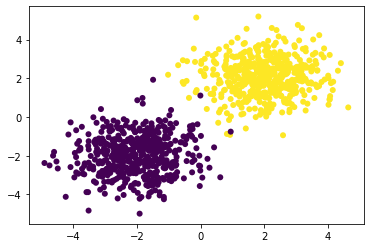

In [28]:
# Generate some data
N = 500

X1 = np.random.randn(N, 2) + np.array([2, 2])
X2 = np.random.randn(N, 2) + np.array([-2, -2])

Y = np.concatenate([np.ones(N), np.zeros(N)])[:, None]
Y = np.hstack([Y, 1-Y])

X = np.vstack([X1, X2])
plt.scatter(X[:, 0], X[:, 1], c=Y[:, 0], edgecolors='none')

Define a **logistic regression** for debugging. 

In [86]:
np.random.seed(RANDOM_STATE)

net = Sequential()
net.add(Linear(2, 2))
net.add(LogSoftMax())

criterion = ClassNLLCriterion()

# Test something like this then 
'''
net = Sequential()
net.add(Linear(2, 4))
net.add(ReLU())
net.add(Linear(4, 2))
net.add(LogSoftMax())
'''
print(net)

Linear 2 -> 2
LogSoftMax



Start with batch_size = 1000 to make sure every step lowers the loss, then try stochastic version.

In [87]:
# Iptimizer params
optimizer_config = {'learning_rate' : 1e-2, 'momentum': 0.9}
optimizer_state = {}

# Looping params
n_epoch = 30
batch_size = 128

In [88]:
# batch generator
def get_batches(dataset, batch_size):
    X, Y = dataset
    n_samples = X.shape[0]

    # Shuffle at the start of epoch
    indices = np.arange(n_samples)
    np.random.shuffle(indices)

    for start in range(0, n_samples, batch_size):
        end = min(start + batch_size, n_samples)
        
        batch_idx = indices[start:end]
    
        yield X[batch_idx], Y[batch_idx]

### Train

Basic training loop. Examine it.

In [89]:
def train_step(net, optimizer, optimizer_config, optimizer_state, 
               criterion, batch_size, data):

    iteration_losses = []

    for x_batch, y_batch in get_batches(data, batch_size):
        net.zeroGradParameters()

        # Forward
        predictions = net.forward(x_batch)
        loss = criterion.forward(predictions, y_batch)

        # Backward
        dp = criterion.backward(predictions, y_batch)
        net.backward(x_batch, dp)

        # Update weights
        optimizer(net.getParameters(), 
                  net.getGradParameters(), 
                  optimizer_config,
                  optimizer_state
                 )  

        iteration_losses.append(loss)

    return np.mean(iteration_losses)


def evaluate(net, criterion, batch_size, data):
    iteration_losses = []
    for x_batch, y_batch in get_batches(data, batch_size):
        predictions = net.forward(x_batch)
        loss = criterion.forward(predictions, y_batch)

        iteration_losses.append(loss)

    return np.mean(iteration_losses)


def train(n_epoch, net, optimizer, optimizer_config, optimizer_state, 
          criterion, batch_size, train_data, val_data=None, verbose=False, 
          shrinkage=None):

    train_loss_history = []
    val_loss_history = [] if val_data else [0]

    for i in range(n_epoch):
        
        t = time()
        net.train()

        loss = train_step(net, optimizer, optimizer_config, optimizer_state, 
                          criterion, batch_size, train_data)
        train_loss_history.append(loss)

        if val_data:
            net.evaluate()
            loss = evaluate(net, criterion, batch_size, val_data)
            val_loss_history.append(loss)

        if verbose:
            print(f'{i+1}/{n_epoch}\tTrain loss: {train_loss_history[-1]:.5f}', end='')
            if val_data:
                y_pred_val = np.argmax(net.forward(val_data[0]), axis=1)
                val_acc = np.mean(y_pred_val == np.argmax(val_data[1], axis=1))

                print(f'\tVal loss: {val_loss_history[-1]:.5f}',
                      f'Val acc: {val_acc:.4f}', f'Time: {time()-t:.4f} sec',
                      sep='\t')
            else:
                print(f'\tTime: {time()-t:.4f} sec')

        if shrinkage:
            optimizer_config['learning_rate'] *= shrinkage

    return train_loss_history, val_loss_history

In [90]:
%%time

np.random.seed(RANDOM_STATE)

train_loss_history, _ = train(n_epoch, net, sgd_momentum, optimizer_config,
                              optimizer_state, ClassNLLCriterion(), batch_size,
                              train_data=(X, Y)
                             )

CPU times: user 37.9 ms, sys: 1.77 ms, total: 39.6 ms
Wall time: 46.7 ms


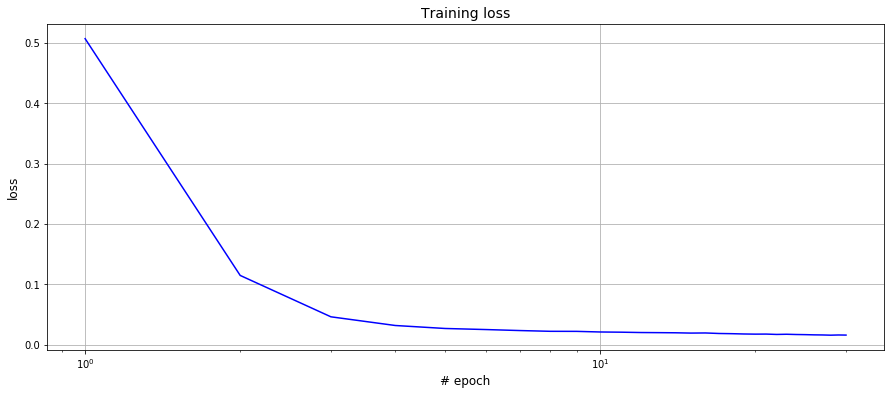

Final train loss: 0.01612


In [91]:
plt.figure(figsize=(15, 6))

plt.title('Training loss', fontsize=14)
plt.xlabel('# epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)

plt.xscale('log')
plt.plot(range(1, n_epoch+1), train_loss_history, 'b')

plt.grid()
plt.show()

print(f'Final train loss: {train_loss_history[-1]:.5f}')   

# Digit classification 

We will be using old good [MNIST](http://yann.lecun.com/exdb/mnist/) as our dataset.

In [101]:
import mnist
X_train, y_train, X_val, y_val, X_test, y_test = mnist.load_dataset()

One-hot encode the labels first.

In [102]:
from sklearn.preprocessing import OneHotEncoder

ohot_encoder = OneHotEncoder(categories=[range(10)])

y_train_hot = np.asarray(ohot_encoder.fit_transform(y_train.reshape(-1, 1)).todense())
y_val_hot = np.asarray(ohot_encoder.transform(y_val.reshape(-1, 1)).todense())
y_test_hot = np.asarray(ohot_encoder.transform(y_test.reshape(-1, 1)).todense())

In [103]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [104]:
def train_nets(nets, n_epoch, train_data, val_data, batch_size, 
               optimizer, optimizer_config, criterion):

    train_loss_histories = {}
    val_loss_histories = {}

    for name, net in nets.items():
        print(name, end='')

        optimizer_state = {}

        t = time()
        train_loss_history, val_loss_history = train(n_epoch, net, optimizer, optimizer_config,
                                                     optimizer_state, criterion, batch_size,
                                                     train_data=train_data, val_data=val_data, 
                                                     verbose=False
                                                    )

        print(f'\t Final train loss: {train_loss_history[-1]:.4f}' + \
              f'\tval loss: {val_loss_history[-1]:.4f}\t time: {time()-t:.2f} sec'
             )

        train_loss_histories[name] = train_loss_history
        val_loss_histories[name] = val_loss_history

    return train_loss_histories, val_loss_histories

-  *[2 pts]* **Compare** `ReLU`, `ELU`, `LeakyReLU`, `SoftPlus` activation functions. 
Use an architecture of your choice for the comparison (no need to pick the best optimizer parameters for now). Write your personal opinion on the activation functions, think about computation times too. Plot the loss curves from activation functions comparison on a single plot. Please find a scale (log?) when the lines are distinguishable, do not forget about naming the axes, the plot should be informative. 

In [105]:
def get_MNIST_net(activation, with_bn=False, dropout=None):
    net = Sequential()
    
    net.add(Linear(784, 256))
    if with_bn:
        net.add(BatchNormalization())
        net.add(ChannelwiseScaling(256))
    if dropout:
        net.add(Dropout(dropout))

    net.add(activation())
    net.add(Linear(256, 64))
    if with_bn:
        net.add(BatchNormalization())
        net.add(ChannelwiseScaling(64))
    if dropout:
        net.add(Dropout(dropout))

    net.add(activation())
    net.add(Linear(64, 10))
    if with_bn:
        net.add(BatchNormalization())
        net.add(ChannelwiseScaling(10))
    if dropout:
        net.add(Dropout(dropout))

    net.add(LogSoftMax())

    return net

In [106]:
n_epoch = 100

# Was changed from 256 to 1000
batch_size = 1000

In [42]:
%%time

np.random.seed(RANDOM_STATE)

activations = [ReLU, ELU, LeakyReLU, SoftPlus]
activation_names = [str(act()) for act in activations]

nets = {name: get_MNIST_net(act) for name, act in zip(activation_names, activations)}

# learning_rate was changed to 1e-3 
optimizer_config = {'learning_rate': 1e-3, 'momentum': 0.9}
optimizer = sgd_momentum

train_loss_histories, val_loss_histories = train_nets(nets, n_epoch,
                                                      (X_train, y_train_hot), (X_val, y_val_hot),
                                                      batch_size, optimizer, optimizer_config,
                                                      criterion
                                                     )

ReLU	 Final train loss: 0.3018	val loss: 0.2794	 time: 170.39 sec
ELU	 Final train loss: 0.3071	val loss: 0.2854	 time: 383.45 sec
LeakyReLU	 Final train loss: 0.2974	val loss: 0.2754	 time: 164.86 sec
SoftPlus	 Final train loss: 0.3567	val loss: 0.3290	 time: 185.34 sec
CPU times: user 25min 12s, sys: 1min 59s, total: 27min 11s
Wall time: 15min 4s


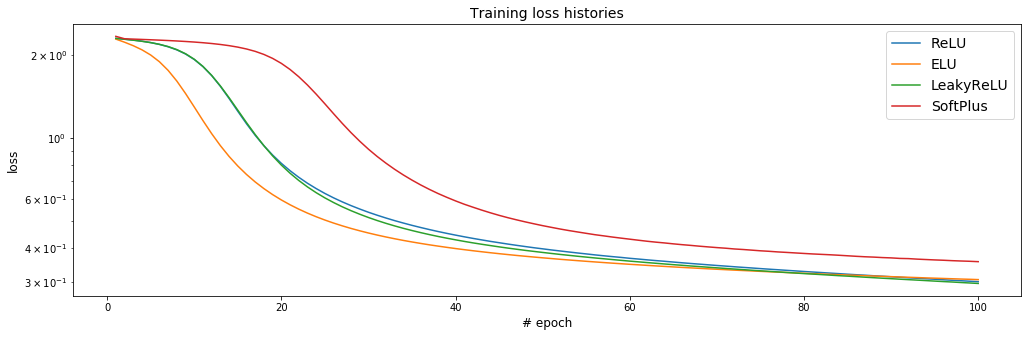

In [43]:
plt.figure(figsize=(17, 5))

plt.title('Training loss histories', fontsize=14)
plt.xlabel('# epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)

#the scale was changed from xscale('log') to yscale('log')
plt.yscale('log')

for name, loss_history in train_loss_histories.items():
    plt.plot(range(1, n_epoch+1), loss_history, label=name)

plt.legend(loc='best', fontsize=14)
plt.show()

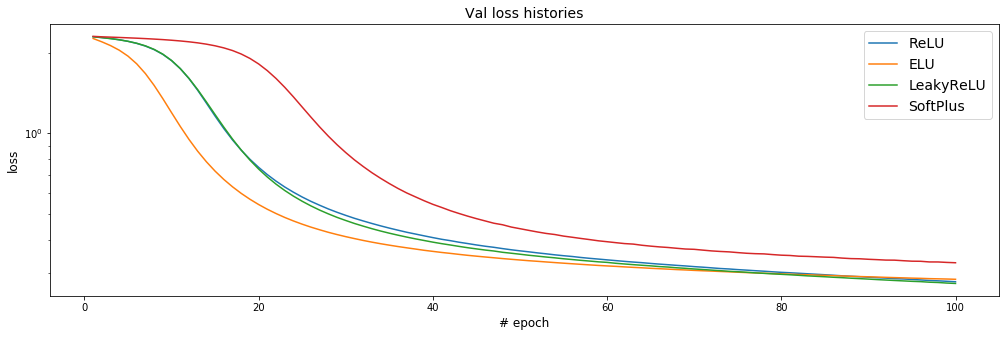

In [44]:
# Valid plots were added

plt.figure(figsize=(17, 5))

plt.title('Val loss histories', fontsize=14)
plt.xlabel('# epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.yscale('log')

for name, loss_history in val_loss_histories.items():
    plt.plot(range(1, n_epoch+1), loss_history, label=name)

plt.legend(loc='best', fontsize=14)
plt.show()

*(small changes)*

- `ReLU` and `LeakyReLU` show very similar results and the lowest time cost. The optimum between time and losses.
- `ELU` has the best loss values, but highest time cost;
- `SoftPlus` is worst activation function for this problem.

- *[1 pts]* **Try** inserting `BatchNormalization` (followed by `ChannelwiseScaling`) between `Linear` module and activation functions. For all activation functions, plot versions with and without `BatchNormalization` on a single plot. Please find a scale (log?) when the lines are distinguishable, do not forget about naming the axes, the plot should be goodlooking.  Does `BatchNormalization` help?

In [45]:
%%time

# learning_rate was changed to 1e-3

np.random.seed(RANDOM_STATE)

nets = {name: get_MNIST_net(act, with_bn=True) for name, act in zip(activation_names, activations)}

optimizer_config = {'learning_rate': 1e-3, 'momentum': 0.9}
optimizer = sgd_momentum

train_loss_bn_histories, val_loss_bn_histories = train_nets(nets, n_epoch,
                                                            (X_train, y_train_hot), (X_val, y_val_hot),
                                                            batch_size, optimizer, optimizer_config,
                                                            criterion
                                                           )

ReLU	 Final train loss: 0.0709	val loss: 0.1093	 time: 229.71 sec
ELU	 Final train loss: 0.2192	val loss: 0.2245	 time: 391.03 sec
LeakyReLU	 Final train loss: 0.0736	val loss: 0.1135	 time: 240.27 sec
SoftPlus	 Final train loss: 0.2514	val loss: 0.2515	 time: 247.49 sec
CPU times: user 31min 6s, sys: 3min 50s, total: 34min 56s
Wall time: 18min 28s


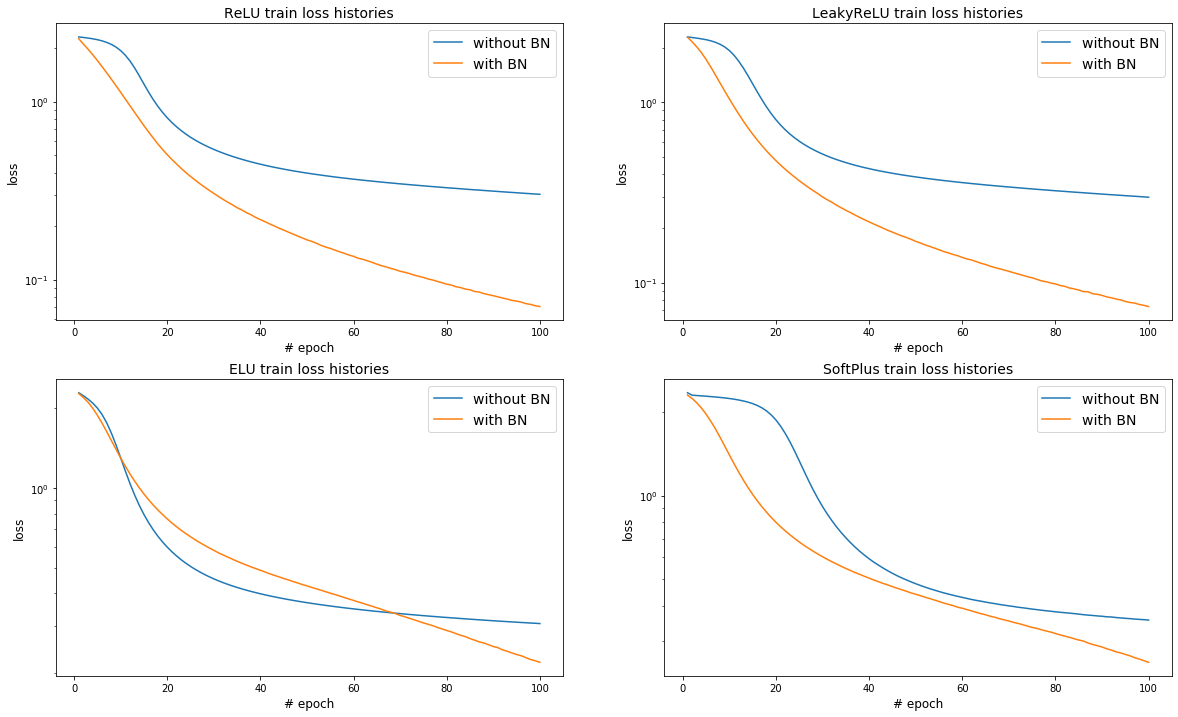

In [46]:
fig, axis = plt.subplots(2, 2, figsize=(20, 12))

for i, name in enumerate(activation_names):

    axis[i%2, i//2].set_title(f'{name} train loss histories', fontsize=14)
    axis[i%2, i//2].set_xlabel('# epoch', fontsize=12)
    axis[i%2, i//2].set_ylabel('loss', fontsize=12)
    
    #the scale was changed from xscale('log') to yscale('log')
    axis[i%2, i//2].set_yscale('log')

    axis[i%2, i//2].plot(range(1, n_epoch+1), train_loss_histories[name], label='without BN')
    axis[i%2, i//2].plot(range(1, n_epoch+1), train_loss_bn_histories[name], label='with BN')

    axis[i%2, i//2].legend(loc='best', fontsize=14)

plt.show()

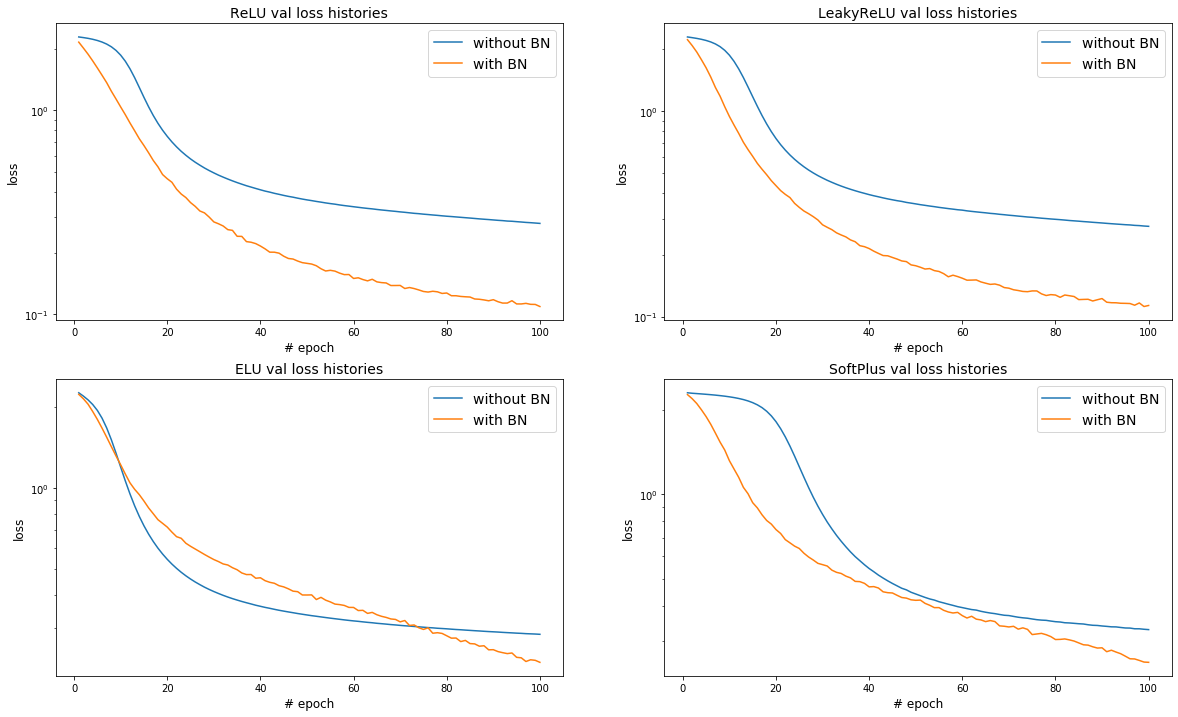

In [48]:
#val plots were added

fig, axis = plt.subplots(2, 2, figsize=(20, 12))

for i, name in enumerate(activation_names):

    axis[i%2, i//2].set_title(f'{name} val loss histories', fontsize=14)
    axis[i%2, i//2].set_xlabel('# epoch', fontsize=12)
    axis[i%2, i//2].set_ylabel('loss', fontsize=12)
    axis[i%2, i//2].set_yscale('log')

    axis[i%2, i//2].plot(range(1, n_epoch+1), val_loss_histories[name], label='without BN')
    axis[i%2, i//2].plot(range(1, n_epoch+1), val_loss_bn_histories[name], label='with BN')

    axis[i%2, i//2].legend(loc='best', fontsize=14)

plt.show()

- `BN` helped achieve the same train loss values in less number of epochs for both train and val;

*(was added)*
- Except for `ELU` desired loss with a larger number of epochns

- *[1 pts]* Plot the losses for two networks: one trained by momentum_sgd, another one trained by Adam. Which one performs better?  

In [49]:
%%time

# learning_rate was changed to 1e-3

np.random.seed(RANDOM_STATE)

nets = {name: get_MNIST_net(act, with_bn=True) for name, act in zip(activation_names, activations)}

optimizer_config = {'learning_rate': 1e-3, 'beta1': 0.9, 'beta2': 0.999, 'epsilon': 1e-8}
optimizer = adam_optimizer

train_loss_adam_histories, val_loss_adam_histories = train_nets(nets, n_epoch,
                                                                (X_train, y_train_hot), (X_val, y_val_hot),
                                                                batch_size, optimizer, optimizer_config,
                                                                criterion
                                                               )

ReLU	 Final train loss: 0.0114	val loss: 0.0711	 time: 286.16 sec
ELU	 Final train loss: 0.0214	val loss: 0.0861	 time: 413.90 sec
LeakyReLU	 Final train loss: 0.0107	val loss: 0.0735	 time: 251.69 sec
SoftPlus	 Final train loss: 0.0291	val loss: 0.0909	 time: 260.53 sec
CPU times: user 32min 58s, sys: 4min 55s, total: 37min 53s
Wall time: 20min 12s


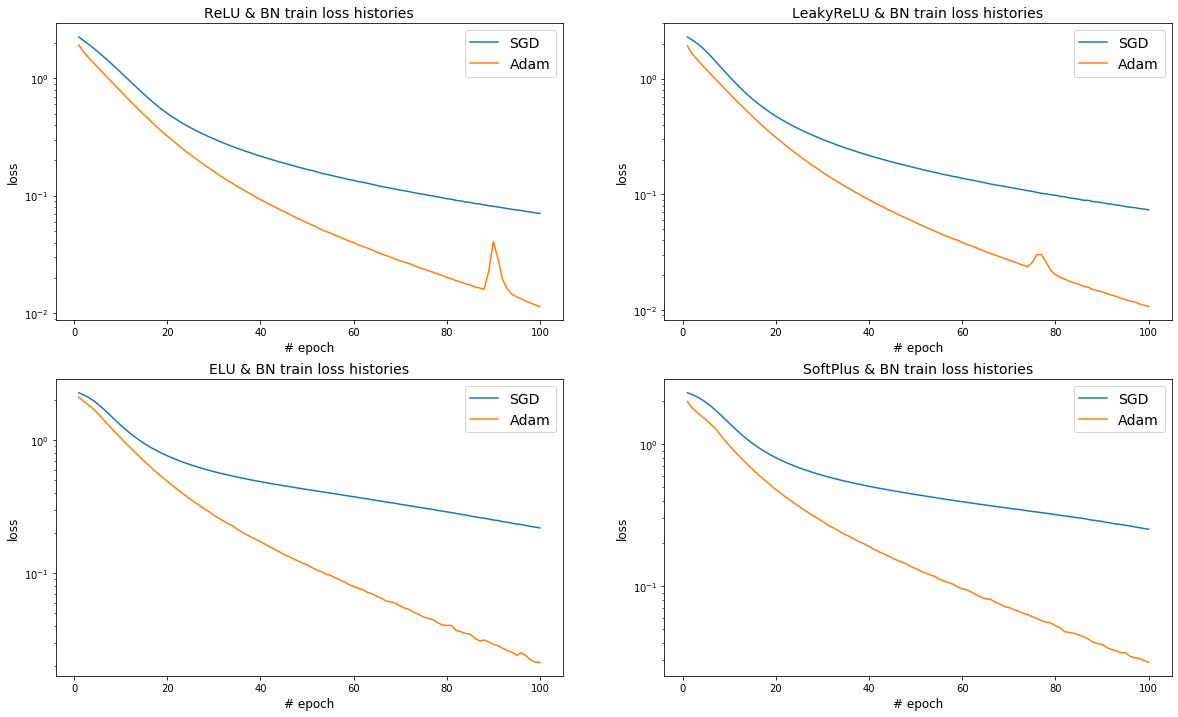

In [50]:
fig, axis = plt.subplots(2, 2, figsize=(20, 12))

for i, name in enumerate(activation_names):

    axis[i%2, i//2].set_title(f'{name} & BN train loss histories', fontsize=14)
    axis[i%2, i//2].set_xlabel('# epoch', fontsize=12)
    axis[i%2, i//2].set_ylabel('loss', fontsize=12)
    
    #the scale was changed from xscale('log') to yscale('log')
    axis[i%2, i//2].set_yscale('log')

    axis[i%2, i//2].plot(range(1, n_epoch+1), train_loss_bn_histories[name], label='SGD')
    axis[i%2, i//2].plot(range(1, n_epoch+1), train_loss_adam_histories[name], label='Adam')

    axis[i%2, i//2].legend(loc='best', fontsize=14)

plt.show()

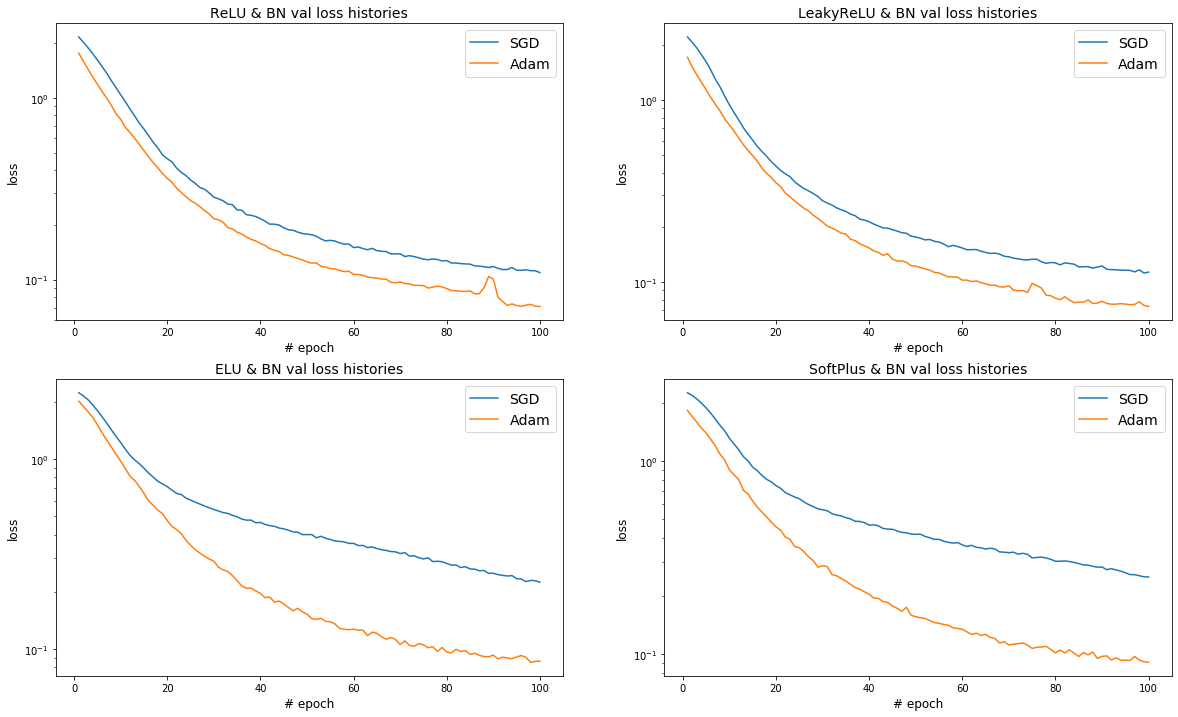

In [108]:
#val plots were added

fig, axis = plt.subplots(2, 2, figsize=(20, 12))

for i, name in enumerate(activation_names):

    axis[i%2, i//2].set_title(f'{name} & BN val loss histories', fontsize=14)
    axis[i%2, i//2].set_xlabel('# epoch', fontsize=12)
    axis[i%2, i//2].set_ylabel('loss', fontsize=12)
    axis[i%2, i//2].set_yscale('log')

    axis[i%2, i//2].plot(range(1, n_epoch+1), val_loss_bn_histories[name], label='SGD')
    axis[i%2, i//2].plot(range(1, n_epoch+1), val_loss_adam_histories[name], label='Adam')

    axis[i%2, i//2].legend(loc='best', fontsize=14)

plt.show()

- `Adam` optimizer showed better results for train loss.

- *[2 pts]* Increase the number of parameters in the network. Try inserting the Dropout layer. Compare the validation performance and the gap between test and validation performances for the two experiments (with and without Dropout). Compare the loss plots. Which one converges slower?

In [52]:
%%time

# learning_rate was changed to 1e-3

np.random.seed(RANDOM_STATE)

nets = {name: get_MNIST_net(act, with_bn=True, dropout=0.3) for name, act in zip(activation_names, activations)}

optimizer_config = {'learning_rate': 1e-3, 'beta1': 0.9, 'beta2': 0.999, 'epsilon': 1e-8}
optimizer = adam_optimizer

train_loss_drop_histories, val_loss_drop_histories = train_nets(nets, n_epoch,
                                                                (X_train, y_train_hot), (X_val, y_val_hot),
                                                                batch_size, optimizer, optimizer_config,
                                                                criterion
                                                               )

ReLU	 Final train loss: 0.4214	val loss: 0.0838	 time: 331.93 sec
ELU	 Final train loss: 0.4658	val loss: 0.0871	 time: 504.77 sec
LeakyReLU	 Final train loss: 0.4153	val loss: 0.0740	 time: 327.70 sec
SoftPlus	 Final train loss: 0.4761	val loss: 0.0996	 time: 322.05 sec
CPU times: user 39min 48s, sys: 5min 14s, total: 45min 2s
Wall time: 24min 46s


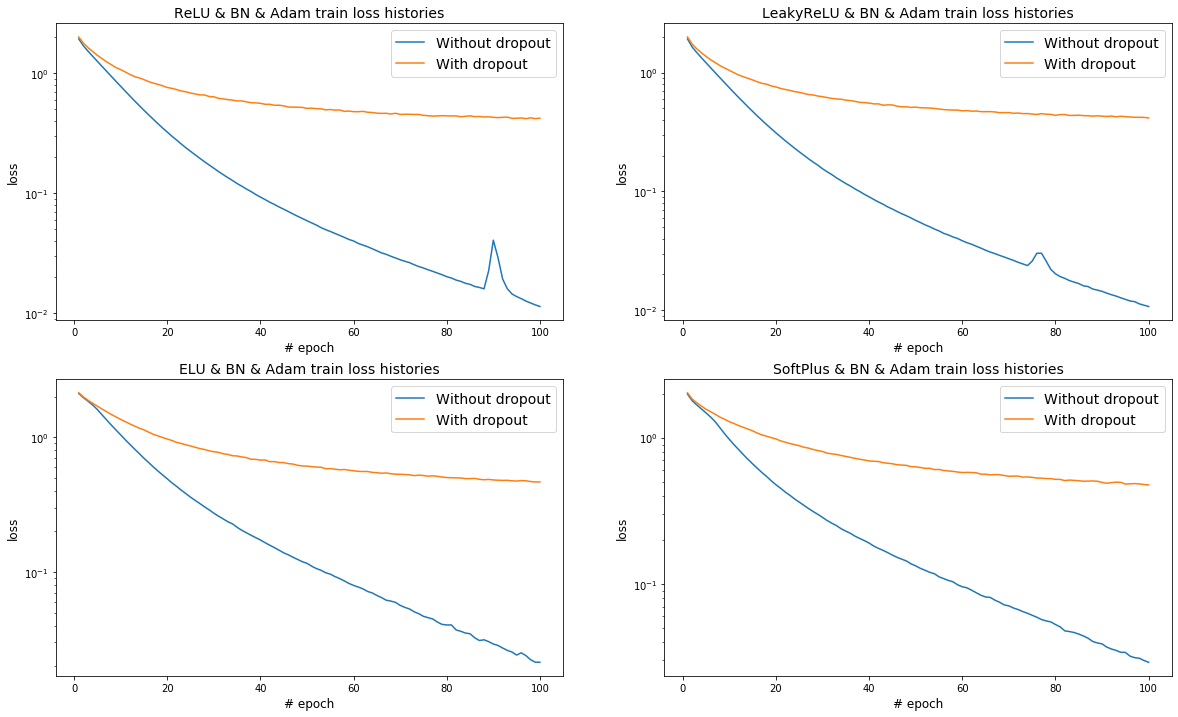

In [54]:
# the plots were added

fig, axis = plt.subplots(2, 2, figsize=(20, 12))

for i, name in enumerate(activation_names):

    axis[i%2, i//2].set_title(f'{name} & BN & Adam train loss histories', fontsize=14)
    axis[i%2, i//2].set_xlabel('# epoch', fontsize=12)
    axis[i%2, i//2].set_ylabel('loss', fontsize=12)
    axis[i%2, i//2].set_yscale('log')

    axis[i%2, i//2].plot(range(1, n_epoch+1), train_loss_adam_histories[name], label='Without dropout')
    axis[i%2, i//2].plot(range(1, n_epoch+1), train_loss_drop_histories[name], label='With dropout')

    axis[i%2, i//2].legend(loc='best', fontsize=14)

plt.show()

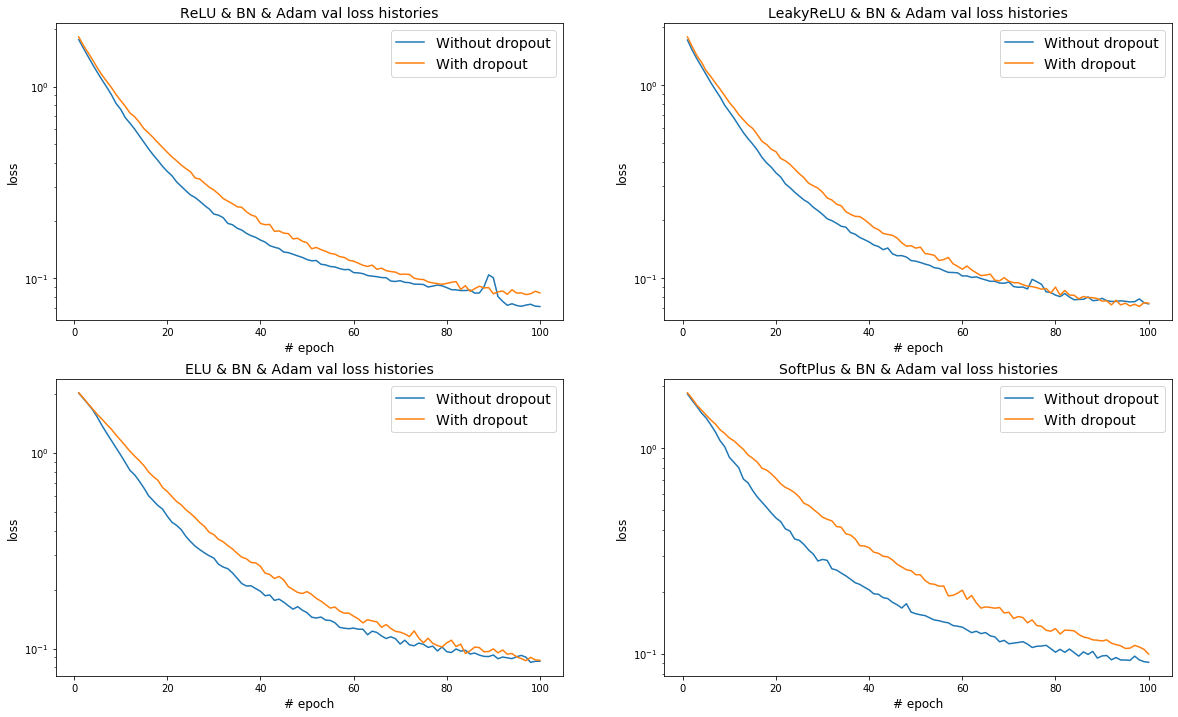

In [55]:
# was changed

fig, axis = plt.subplots(2, 2, figsize=(20, 12))

for i, name in enumerate(activation_names):

    axis[i%2, i//2].set_title(f'{name} & BN & Adam val loss histories', fontsize=14)
    axis[i%2, i//2].set_xlabel('# epoch', fontsize=12)
    axis[i%2, i//2].set_ylabel('loss', fontsize=12)
    
    #the scale was changed from xscale('log') to yscale('log')
    axis[i%2, i//2].set_yscale('log')

    axis[i%2, i//2].plot(range(1, n_epoch+1), val_loss_adam_histories[name], label='Without dropout')
    axis[i%2, i//2].plot(range(1, n_epoch+1), val_loss_drop_histories[name], label='With dropout')

    axis[i%2, i//2].legend(loc='best', fontsize=14)

plt.show()

*(was added)*

In our case the `val` and `test` are equal to the net. Then let's compare train and val losses.

For our data and model `Dropout` hasn't improved the val for any activation function.

The `LeakyReLU` & `BN` & `Adan` & `Without dropout` has the best val result. Then let's check it on the test

In [64]:
# was added

y_pred = np.argmax(nets['LeakyReLU'].forward(X_val), axis=1)
print(f'Val acc: {np.mean(y_pred == y_val)}')

Val acc: 0.9831


In [65]:
# was added

y_pred = np.argmax(nets['LeakyReLU'].forward(X_test), axis=1)
print(f'Test acc: {np.mean(y_pred == y_test)}')

Test acc: 0.9817


# Part 4: Convolutional neural networks

In the previous part you needed to train a dense, or fully-connected, neural network. This part of the homework is to prepare modules for training a basic convolutional network: `Conv2D`, `Flatten`, `MaxPool2d`. 

Your task is to implement a simple framework for convolutional neural networks training. While convolutional neural networks is a subject of lecture 3, we expect that there are a lot of students who are familiar with the topic.

In order to successfully complete this part, you will have to:

- Implement all the layers below (`Conv2d`, `MaxPool2d`; `Flatten` is already implemented for convenience). Good implementation should pass all the tests in the subsequent cells.
- Train a CNN that has at least one `Conv2d` layer and at least one `MaxPool2d` layer and achieves at least 97% accuracy on MNIST test set.

Feel free to use the code from Part 3 for debugging or as a source of code snippets. 

# Layers for Part 4

## 12. Conv2d *[2 pts]*
- input:   **`batch_size x in_channels x h x w`**
- output: **`batch_size x out_channels x h x w`**

You should implement a layer which works like PyTorch `Conv2d` layer with `stride=1` and zero-padding outside of image using `scipy.signal.correlate` function.

Practical notes:
- While the layer name is "convolution", most of neural network frameworks (including TensorFlow and PyTorch) implement operation that is called [cross-correlation](https://en.wikipedia.org/wiki/Cross-correlation#Cross-correlation_of_deterministic_signals) in signal processing theory. So **don't use** `scipy.signal.convolve` since it implements [convolution](https://en.wikipedia.org/wiki/Convolution#Discrete_convolution) in terms of signal processing.
- It may be convenient to use `np.pad` or `skimage.util.pad` for zero-padding.
- It's rather ok to implement convolution over 4d array using 2 nested loops: one over batch size dimension and another one over output filters dimension
- Having troubles with understanding how to implement the layer? 
 - Check out e.g. this link on how to make forward pass and to calculate all the gradients: https://towardsdatascience.com/backpropagation-in-a-convolutional-layer-24c8d64d8509
 - May the google be with you

In [66]:
import scipy as sp
import scipy.signal
import skimage


class Conv2d(Module):
    def __init__(self, in_channels, out_channels, kernel_size):
        super(Conv2d, self).__init__()
        assert kernel_size % 2 == 1, kernel_size

        stdv = 1./np.sqrt(in_channels)
        self.W = np.random.uniform(-stdv, stdv, size=(out_channels, in_channels, kernel_size, kernel_size))
        self.b = np.random.uniform(-stdv, stdv, size=(out_channels,))
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size

        self.gradW = np.zeros_like(self.W)
        self.gradb = np.zeros_like(self.b)

    def updateOutput(self, input):
        pad_size = self.kernel_size // 2
        # YOUR CODE ##############################
        # 1. zero-pad the input array
        padded_input = np.pad(input, ((0,), (0,), (pad_size,), (pad_size,)), 'constant')

        # 2. compute convolution using scipy.signal.correlate(... , mode='valid')
        output_shape = list(input.shape)
        output_shape[1] = self.out_channels
        self.output = np.zeros(output_shape, dtype=input.dtype)

        for i in range(len(input)):
            for j in range(self.out_channels):
                self.output[i, j] = scipy.signal.correlate(padded_input[i], self.W[j], mode='valid').squeeze()

        # 3. add bias value
        self.output += self.b.reshape((1, self.out_channels, 1, 1))

        return self.output

    def updateGradInput(self, input, gradOutput):
        pad_size = self.kernel_size // 2
        # YOUR CODE ##############################
        # 1. zero-pad the gradOutput
        padded_grad = np.pad(gradOutput, ((0,), (0,), (pad_size,), (pad_size,)), 'constant')

        # 2. compute 'self.gradInput' value using scipy.signal.correlate(... , mode='valid')
        self.gradInput = np.zeros_like(input)
        for i in range(len(input)):
            for j in range(self.in_channels):
                self.gradInput[i, j] = scipy.signal.correlate(padded_grad[i], 
                                                              np.rot90(self.W[:, j, :, :], 2, (1, 2)),
                                                              mode='valid'
                                                             ).squeeze()

        return self.gradInput

    def accGradParameters(self, input, gradOutput):
        pad_size = self.kernel_size // 2
        # YOUR CODE #############
        # 1. zero-pad the input
        padded_input = np.pad(input, ((0,), (0,), (pad_size,), (pad_size,)), 'constant')

        # 2. compute 'self.gradW' using scipy.signal.correlate(... , mode='valid')
        self.gradW = np.zeros_like(self.W)
        for i in range(self.out_channels):
            for j in range(self.in_channels):
                self.gradW[i, j] = scipy.signal.correlate(padded_input[:, j, :, :], 
                                                          gradOutput[:, i, :, :],
                                                          mode='valid'
                                                         ).squeeze()

        # 3. compute 'self.gradb' - formulas like in Linear of ChannelwiseScaling layers
        self.gradb = np.sum(gradOutput, axis=(0, 2, 3))

    def zeroGradParameters(self):
        self.gradW.fill(0)
        self.gradb.fill(0)

    def getParameters(self):
        return [self.W, self.b]

    def getGradParameters(self):
        return [self.gradW, self.gradb]

    def __repr__(self):
        s = self.W.shape
        q = 'Conv2d %d -> %d' %(s[1], s[0])
        return q

## 13. MaxPool2d *[2 pts]*
- input:   **`batch_size x n_input_channels x h x w`**
- output: **`batch_size x n_output_channels x h // kern_size x w // kern_size`**

You are to implement simplified version of pytorch `MaxPool2d` layer with stride = kernel_size. Please note, that it's not a common case that stride = kernel_size: in AlexNet and ResNet kernel_size for max-pooling was set to 3, while stride was set to 2. We introduce this restriction to make implementation simplier.

Practical notes:
- During forward pass what you need to do is just to reshape the input tensor to `[n, c, h / kern_size, kern_size, w / kern_size, kern_size]`, swap two axes and take maximums over the last two dimensions. Reshape + axes swap is sometimes called space-to-batch transform.
- During backward pass you need to place the gradients in positions of maximal values taken during the forward pass
- In real frameworks the indices of maximums are stored in memory during the forward pass. It is cheaper than to keep the layer input in memory and recompute the maximums. 

**Hint:** `np.put_along_axis` might be useful during backward pass.

In [67]:
class MaxPool2d(Module):
    def __init__(self, kernel_size):
        super(MaxPool2d, self).__init__()
        self.kernel_size = kernel_size
        self.gradInput = None

    def updateOutput(self, input):
        input_h, input_w = input.shape[-2:]
        # your may remove these asserts and implement MaxPool2d with padding
        assert input_h % self.kernel_size == 0  
        assert input_w % self.kernel_size == 0

        # YOUR CODE #############################
        pooling_shape = input.shape[:2] + (input.shape[2] // self.kernel_size, self.kernel_size,
                                           input.shape[3] // self.kernel_size, self.kernel_size
                                          )

        input_swaped = input.reshape(pooling_shape).transpose(0, 1, 2, 4, 3, 5)
        self.output = input_swaped.max(axis=(4, 5))

        idx_shape = input_swaped.shape[:4] + (self.kernel_size ** 2, )

        self.max_indices = np.argmax(input_swaped.reshape(idx_shape), axis=4)[..., np.newaxis]

        return self.output

    def updateGradInput(self, input, gradOutput):
        # YOUR CODE #############################
        idx_shape = input.shape[:2] + (input.shape[2] // self.kernel_size,
                                       input.shape[3] // self.kernel_size,
                                       self.kernel_size ** 2
                                      )

        self.gradInput = np.zeros(idx_shape)
        np.put_along_axis(self.gradInput, self.max_indices, gradOutput[..., np.newaxis], axis=4)

        pooling_shape = idx_shape[:-1] + (self.kernel_size, self.kernel_size)
        self.gradInput = self.gradInput.reshape(pooling_shape) \
                                       .transpose(0, 1, 2, 4, 3, 5) \
                                       .reshape(input.shape)
        
        return self.gradInput

    def __repr__(self):
        q = 'MaxPool2d, kern %d, stride %d' %(self.kernel_size, self.kernel_size)
        return q

### Flatten layer
Just reshapes inputs and gradients. It's usually used as proxy layer between Conv2d and Linear.

The layer is already implemented below, you don't need to change it.

In [68]:
class Flatten(Module):
    def __init__(self):
        super(Flatten, self).__init__()
    
    def updateOutput(self, input):
        self.output = input.reshape(len(input), -1)
        return self.output
    
    def updateGradInput(self, input, gradOutput):
        self.gradInput = gradOutput.reshape(input.shape)
        return self.gradInput
    
    def __repr__(self):
        return "Flatten"

# Testing your layers

Please run the following cells to check if the implementations are correct (all tests are passed):

In [69]:
from test_modules import make_advanced_tester
import unittest

In [70]:
TestLayersAdv = make_advanced_tester({
    'Conv2d': Conv2d,
    'Flatten': Flatten,
    'MaxPool2d': MaxPool2d,
})

In [71]:
suite = unittest.TestLoader().loadTestsFromTestCase(TestLayersAdv)

In [72]:
unittest.TextTestRunner(verbosity=2).run(suite)

test_Conv2d (test_modules.make_advanced_tester.<locals>._tester) ... ok
test_MaxPool2d (test_modules.make_advanced_tester.<locals>._tester) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.374s

OK


<unittest.runner.TextTestResult run=2 errors=0 failures=0>

# Training a convolutional network  *[3 pts]*

Here you task is to train a CNN that has at least one `Conv2d` layer and `MaxPool2d` layer which achieves at least 97% accuracy on MNIST **test** set.

**Hint:** Layers implemented in this homework run on CPU, and if the network is too deep, training might last forever, so we suggest to start with smaller networks. This subtask can be solved with a ConvNet having only 3 `Conv2d` layers (or even less) with a small number of channels.

In [73]:
%matplotlib inline
from time import time, sleep
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

In [74]:
import mnist
X_train, y_train, X_val, y_val, X_test, y_test = mnist.load_dataset()  # your dataset

X_train = X_train[:, np.newaxis, :, :]
X_val = X_val[:, np.newaxis, :, :]
X_test = X_test[:, np.newaxis, :, :]

In [75]:
from sklearn.preprocessing import OneHotEncoder

ohot_encoder = OneHotEncoder(categories=[range(10)])

y_train_hot = np.asarray(ohot_encoder.fit_transform(y_train.reshape(-1, 1)).todense())
y_val_hot = np.asarray(ohot_encoder.transform(y_val.reshape(-1, 1)).todense())
y_test_hot = np.asarray(ohot_encoder.transform(y_test.reshape(-1, 1)).todense())

In [98]:
# conv & linear layers were changed

np.random.seed(RANDOM_STATE)

cnn_net = Sequential()

cnn_net.add(Conv2d(1, 4, 3))
cnn_net.add(ReLU())
cnn_net.add(MaxPool2d(2)) # 4 channels, 14 x 14

cnn_net.add(Conv2d(4, 8, 3))
cnn_net.add(ReLU())
cnn_net.add(MaxPool2d(2)) # 8 channels, 7 x 7
cnn_net.add(Flatten())

cnn_net.add(Linear(8*7*7, 128))
cnn_net.add(ReLU())
cnn_net.add(BatchNormalization())
cnn_net.add(ChannelwiseScaling(128))

cnn_net.add(Linear(128, 64))
cnn_net.add(ReLU())
cnn_net.add(BatchNormalization())
cnn_net.add(ChannelwiseScaling(64))

cnn_net.add(Linear(64, 10))
cnn_net.add(LogSoftMax())

In [99]:
optimizer_config = {'learning_rate': 1e-1, 'beta1': 0.9, 'beta2': 0.999, 'epsilon': 1e-8}
optimizer_state = {}
optimizer = adam_optimizer
criterion = ClassNLLCriterion()
batch_size = 256
n_epoch = 10

In [94]:
%%time
train_loss_history, val_loss_history = train(n_epoch, cnn_net, optimizer, optimizer_config,
                                             optimizer_state, criterion, batch_size,
                                             train_data=(X_train, y_train_hot),
                                             val_data=(X_val, y_val_hot), verbose=True
                                            )

1/10	Train loss: 0.23295	Val loss: 0.10672	Val acc: 0.9685	Time: 777.2200 sec
2/10	Train loss: 0.11120	Val loss: 0.23161	Val acc: 0.9667	Time: 763.3245 sec
3/10	Train loss: 0.09700	Val loss: 0.09393	Val acc: 0.9714	Time: 748.1537 sec
4/10	Train loss: 0.09145	Val loss: 0.11425	Val acc: 0.9680	Time: 748.6051 sec
5/10	Train loss: 0.08531	Val loss: 0.23799	Val acc: 0.9628	Time: 745.9829 sec
6/10	Train loss: 0.08723	Val loss: 0.22569	Val acc: 0.9627	Time: 794.0304 sec
7/10	Train loss: 0.10395	Val loss: 66.56769	Val acc: 0.9721	Time: 809.3044 sec
8/10	Train loss: 0.08738	Val loss: 0.65371	Val acc: 0.9626	Time: 804.8570 sec
9/10	Train loss: 0.07858	Val loss: 0.09260	Val acc: 0.9743	Time: 811.7800 sec
10/10	Train loss: 0.07832	Val loss: 0.10090	Val acc: 0.9741	Time: 801.8874 sec
CPU times: user 3h 38min 53s, sys: 12min 52s, total: 3h 51min 45s
Wall time: 2h 10min 5s


In [95]:
# was added

pred_proba = cnn_net.forward(X_val)
y_pred = np.argmax(pred_proba, axis=1)
print(f'Val acc: {np.mean(y_pred == y_val):.4f}')

Val acc: 0.9741


In [96]:
pred_proba = cnn_net.forward(X_test)
y_pred = np.argmax(pred_proba, axis=1)
print(f'Test acc: {np.mean(y_pred == y_test):.4f}')

Test acc: 0.9732


### Reward

Once done with the homework, check out [this link](https://www.cs.ryerson.ca/~aharley/vis/conv/) with some beautiful 3D visualization of what convnets really learn on MNIST :)

You can also see [here](https://www.cs.ryerson.ca/~aharley/vis/fc/) that fully-connected networks are not so interpretable. 